### 데이터 간단 EDA 

노션이 제시하는 방향 : OTT별 고객층 인구 통계학적 특성 선호 장르 평점 경향성등 특징 비교   





In [913]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [914]:
# read csv 

#df =pd.read_csv("./Data_bob/titles.csv")
#df_credit = pd.read_csv("./Data_bob/credits.csv")

df =pd.read_csv("titles.csv")
df_credit = pd.read_csv("credits.csv")



In [915]:
df.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon
1,1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon
2,2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon
3,3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,Amazon
4,4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,Amazon


In [916]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [917]:
df['platform']

0        Amazon 
1        Amazon 
2        Amazon 
3        Amazon 
4        Amazon 
          ...   
25768      Hulu 
25769      Hulu 
25770      Hulu 
25771      Hulu 
25772      Hulu 
Name: platform, Length: 25773, dtype: object

In [918]:
df.replace('Amazon ','AmazonPrime', inplace = True)

In [919]:
df['platform'].value_counts()

AmazonPrime    9871
Netflix        5850
HBO            3294
Paramount      2825
Hulu           2398
Disney         1535
Name: platform, dtype: int64

In [920]:
df.replace('Disney ','Disney', inplace = True)
df.replace('Netflix ','Netflix', inplace = True)
df.replace('HBO ','HBO', inplace = True)
df.replace('Paramount ','Paramount', inplace = True)
df.replace('Hulu ','Hulu', inplace = True)

In [921]:
"""
각 계절마다 보는 영화나 쇼 
런타임 긴 영화 순위 짧은 영화 순위 

"""
df.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,25773.000000,25773.000000,6590.000000,23093.000000,2.305200e+04,24984.000000,22355.000000
mean,2004.829434,77.948512,2.945220,6.323011,2.579271e+04,17.070832,6.466907
std,23.349734,36.694851,4.039929,1.284180,1.052111e+05,95.117032,1.388482
min,1901.000000,0.000000,1.000000,1.000000,5.000000e+00,0.000011,0.500000
25%,2003.000000,48.000000,1.000000,5.500000,2.200000e+02,1.806750,5.700000
50%,2015.000000,85.000000,2.000000,6.400000,1.218500e+03,4.487000,6.600000
75%,2019.000000,100.000000,3.000000,7.300000,7.807000e+03,11.926250,7.400000
max,2022.000000,549.000000,63.000000,9.900000,2.555504e+06,9323.832000,10.000000


In [922]:
df.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.054477,-0.448872,0.055738,0.003561,0.060380,0.170901
runtime,-0.054477,1.000000,-0.029529,-0.147114,0.187538,-0.003935,-0.213325
seasons,-0.448872,-0.029529,1.000000,0.030360,0.154881,0.078289,-0.030995
imdb_score,0.055738,-0.147114,0.030360,1.000000,0.208378,0.064214,0.623464
imdb_votes,0.003561,0.187538,0.154881,0.208378,1.000000,0.168506,0.157705
tmdb_popularity,0.060380,-0.003935,0.078289,0.064214,0.168506,1.000000,0.093217
tmdb_score,0.170901,-0.213325,-0.030995,0.623464,0.157705,0.093217,1.000000


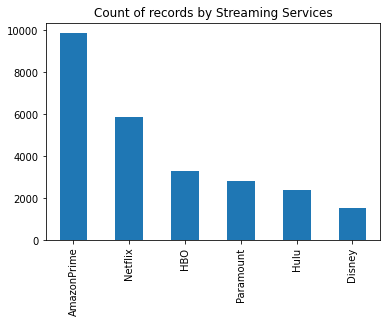

In [923]:
# 각 플랫폼 영화 숫자 파악 
#pokemon["Type 2"].value_counts().plot(kind="bar")
#"Count of records by Streaming Services"

df["platform"].value_counts().plot(kind="bar")
plt.title("Count of records by Streaming Services")
plt.show()

<AxesSubplot:xlabel='tmdb_popularity', ylabel='Density'>

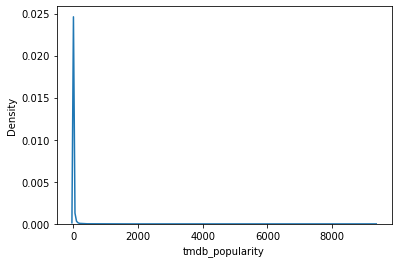

In [924]:

# vote 시각화 해보기 
sns.kdeplot(df["tmdb_popularity"])

In [925]:
df.shape

(25773, 16)

In [926]:
# 4개 모두 만족 확인 
df[(df["imdb_votes"].isna()==True)&(df["imdb_score"].isna()==True)&(df["tmdb_popularity"].isna()==True)&(df["tmdb_score"].isna()==True)]


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
672,tm582037,Ye Shang Hai,MOVIE,NaN,1941,NaN,62,['drama'],[],NaN,tt3594666,NaN,NaN,NaN,NaN,AmazonPrime
731,tm686160,Peculiar Pets,MOVIE,"In this documentary, we meet the families whom...",1921,NaN,47,['documentation'],[],NaN,tt0981329,NaN,NaN,NaN,NaN,AmazonPrime
795,tm769632,Sri Valli,MOVIE,"Valli, a tribal girl falls in love with Muruga...",1945,NaN,114,['drama'],[],NaN,tt0240922,NaN,NaN,NaN,NaN,AmazonPrime
1661,tm544335,Dhonni Meye,MOVIE,NaN,1975,NaN,133,['drama'],[],NaN,tt5526358,NaN,NaN,NaN,NaN,AmazonPrime
1664,tm539392,John Brown's Body,MOVIE,Television play based on the Pulitzer prize- w...,1962,NaN,90,['drama'],[],NaN,tt5868054,NaN,NaN,NaN,NaN,AmazonPrime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24940,ts107355,pocket.watch HobbyKidsTV Ultimate mishmash,SHOW,NaN,2018,TV-G,9,['family'],['US'],1.0,tt8927760,NaN,NaN,NaN,NaN,Hulu
24941,ts107358,pocket.watch JillianTubeHD Ultimate mishmash,SHOW,JillianTubeHD is sharing her love of creative ...,2018,TV-G,17,['family'],['US'],1.0,tt8927812,NaN,NaN,NaN,NaN,Hulu
25495,tm1053160,Blippi's Snowflake Scavenger Hunt,MOVIE,Blippi embarks on an amazing holiday scavenger...,2020,NaN,52,[],[],NaN,tt14296338,NaN,NaN,NaN,NaN,Hulu
25498,ts265434,Jillian's Mystery Craft Box by pocket.watch,SHOW,NaN,2020,NaN,13,['family'],[],1.0,tt12670014,NaN,NaN,NaN,NaN,Hulu


In [927]:
# 4개 만족하는거 drop하기 
index_drop=df[(df["imdb_votes"].isna()==True)&(df["imdb_score"].isna()==True)&(df["tmdb_popularity"].isna()==True)&(df["tmdb_score"].isna()==True)].index
df.drop(index_drop,inplace=True)



In [928]:
df[df['platform'] == 'AmazonPrime'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,AmazonPrime
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,AmazonPrime
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,AmazonPrime
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,AmazonPrime


In [929]:
df[df['platform'] == 'Hulu'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
23375,ts20475,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9,Hulu
23376,ts20413,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0,Hulu
23377,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1,Hulu
23378,ts20669,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3,Hulu
23379,ts21049,The Mary Tyler Moore Show,SHOW,30-year-old single Mary Richards moves to Minn...,1970,TV-PG,28,['comedy'],['US'],7.0,tt0065314,8.2,8692.0,9.290,7.5,Hulu


In [930]:
df.shape

(25483, 16)

In [931]:
df.loc[20133]

id                                                                tm80361
title                                                 The Thief of Bagdad
type                                                                MOVIE
description             When Prince Ahmad is blinded and cast out of B...
release_year                                                         1940
age_certification                                                     NaN
runtime                                                               106
genres                                   ['fantasy', 'family', 'romance']
production_countries                                               ['GB']
seasons                                                               NaN
imdb_id                                                         tt0033152
imdb_score                                                            7.4
imdb_votes                                                        13139.0
tmdb_popularity                       

In [932]:
# 결측치 확인 
df.isnull().sum()

id                          0
title                       0
type                        0
description                92
release_year                0
age_certification       12594
runtime                     0
genres                      0
production_countries        0
seasons                 18979
imdb_id                  2080
imdb_score               2390
imdb_votes               2431
tmdb_popularity           499
tmdb_score               3128
platform                    0
dtype: int64

In [933]:
df["imdb_votes"].mean()

25792.705058129446

In [934]:
df["tmdb_popularity"].mean()

17.07083246914531

In [935]:
df["imdb_score"].mean()

6.3230113021261865

In [936]:
df["tmdb_score"].mean()

6.466906687541937

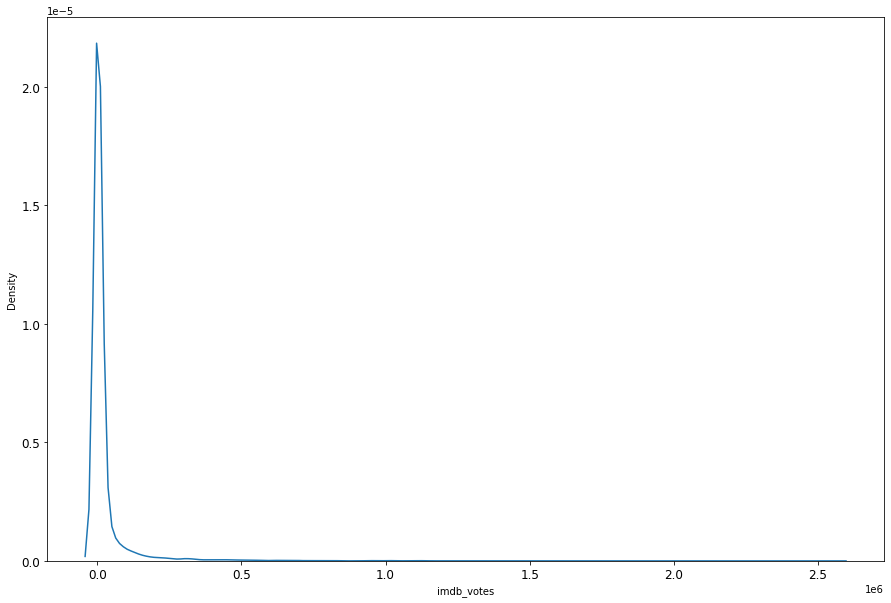

In [937]:
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data=df['imdb_votes'])
ax.tick_params(labelsize=12)

<AxesSubplot:xlabel='tmdb_popularity', ylabel='Density'>

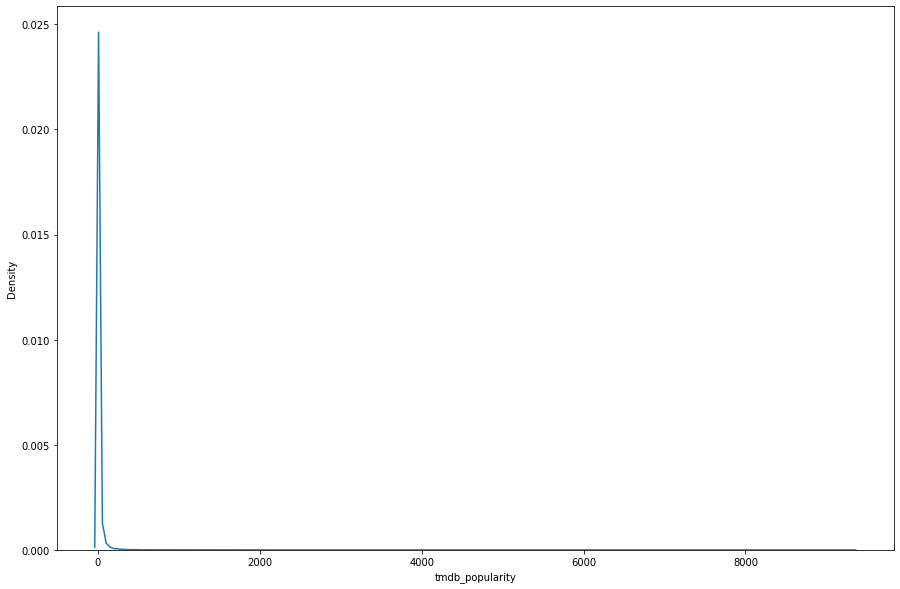

In [938]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=df['tmdb_popularity'])

In [939]:
# title 결측치 삭제 하기 
df = df[~df["title"].isnull()]


# age_certification 결측치 없에기 

print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

# seasons의 nan은 0으로 하기 
df["seasons"].fillna(0,inplace=True)


#나머지 결측치는 평균값으로 하기 
df["imdb_score"].fillna(df["imdb_score"].mean(),inplace=True)
df["imdb_votes"].fillna(df["imdb_votes"].mean(),inplace=True)
df["tmdb_popularity"].fillna(df["tmdb_popularity"].mean(),inplace=True)
df["tmdb_score"].fillna(df["tmdb_score"].mean(),inplace=True)


['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


In [940]:
# 결측치 확인 
df.isnull().sum()

id                         0
title                      0
type                       0
description               92
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                 2080
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
platform                   0
dtype: int64

In [941]:
df[df["id"]=="tm1018386"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
25771,tm1018386,The United States vs. Billie Holiday Special: ...,MOVIE,A conversation moderated by Oprah Winfrey with...,2021,Not Rated,45,['drama'],['US'],0.0,NaN,6.323011,25792.705058,1.4,9.0,Hulu


In [942]:
#drop_id_idx=(df[(df["imdb_id"].isna()==True)]["title"].duplicated()).index

#id_drop = (df[(df["imdb_id"].isna()==True)]["title"].duplicated())


In [943]:

"""
행 추가
id 같은거 하나 삭제 하고 플랫폼 합치기 
-> 같은 이름의 타이틀 제거 가능

근데 id가 결측치인데 타이틀 같은거는 어떻게 하냐> 일단 위에 꺼 하고 난다음 진행하시죠 
"""
#df["platform"] = df["platform"].values+' '
#df["platform"]
g = df["platform"].groupby(df["id"]).sum()

temp_g=list(g)
#for i in D.columns:
 #   df.["imdb_id"][str(i)] = g[i]

In [944]:
df.drop_duplicates(subset=["id"],inplace=True)


In [945]:
df.shape # 줄어든거 확인 

(23266, 16)

In [946]:
g.shape[0]

23266

In [947]:
g=g.reset_index()
g["platform"]

0                      Disney
1                         HBO
2        AmazonPrimeParamount
3                 AmazonPrime
4                     Netflix
                 ...         
23261               Paramount
23262               Paramount
23263               Paramount
23264                 Netflix
23265                     HBO
Name: platform, Length: 23266, dtype: object

In [948]:
df.isnull().sum()

id                         0
title                      0
type                       0
description               92
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                 2030
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
platform                   0
dtype: int64

In [949]:
#df["platform"] = g

df["platform"] = g["platform"]

In [950]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Disney
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,HBO
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,AmazonPrimeParamount
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,Netflix


In [951]:
df[df['platform'] == 'AmazonPrime'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime
11,tm88001,The Stranger,MOVIE,A man working for the War Crimes Commission su...,1946,Not Rated,95,"['thriller', 'crime', 'drama']",['US'],0.0,tt0038991,7.3,26293.0,7.566,7.3,AmazonPrime
13,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"['drama', 'crime']",['US'],0.0,tt0028346,3.7,8617.0,5.412,4.1,AmazonPrime
14,tm2838,The Most Dangerous Game,MOVIE,When legendary hunter Bob Rainsford is shipwre...,1932,Not Rated,63,"['thriller', 'horror', 'action']",['US'],0.0,tt0023238,7.1,12203.0,8.828,7.0,AmazonPrime
16,tm3781,The Woman in the Window,MOVIE,A seductive woman gets an innocent professor m...,1944,Not Rated,99,"['drama', 'thriller', 'crime']",['US'],0.0,tt0037469,7.6,15909.0,6.018,7.5,AmazonPrime


In [952]:
df[df['platform'] == 'Hulu'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Not Rated,96,"['western', 'drama']",['US'],0.0,tt0031971,7.8,48149.0,11.786,7.7,Hulu
26,tm162994,Made for Each Other,MOVIE,A couple struggle to find happiness after a wh...,1939,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0031602,6.3,3582.0,6.242,6.1,Hulu
27,tm2721,The Thief of Bagdad,MOVIE,A recalcitrant thief vies with a duplicitous M...,1924,Not Rated,149,"['romance', 'family', 'fantasy']",['US'],0.0,tt0015400,7.7,6134.0,7.166,7.4,Hulu
50,tm108119,Hangmen Also Die!,MOVIE,"During the Nazi occupation of Czechoslovakia, ...",1943,Not Rated,134,"['thriller', 'war', 'drama']",['US'],0.0,tt0035966,7.4,5442.0,6.772,7.0,Hulu
64,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,Not Rated,79,"['thriller', 'crime']",['US'],0.0,tt0040427,7.1,5943.0,5.253,6.7,Hulu


In [953]:
df.dtypes



id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
platform                 object
dtype: object

In [954]:
df.shape

(23266, 16)

In [955]:
idx=df[df["platform"].isna()==True].index

df.drop(idx,inplace=True)

In [956]:
M=df["imdb_votes"].quantile(0.95)

In [957]:
C=df["imdb_score"].mean()

In [958]:

#imdb_pop 계산 


df["imdb_pop"] = (df["imdb_votes"]/(df["imdb_votes"]+M))*df["imdb_score"] +(M/(df["imdb_votes"]+M))*C




In [959]:
df.shape

(21112, 17)

In [960]:
df.isnull().sum()

id                         0
title                      0
type                       0
description               84
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                 1882
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
platform                   0
imdb_pop                   0
dtype: int64

In [961]:
#normalization_df_imdb_score=(df["imdb_score"]-df["imdb_score"].min())/(df["imdb_score"].max()-df["imdb_score"].min())
#noraml_imdb_votes=(df["imdb_votes"]-df["imdb_votes"].min())/(df["imdb_votes"].max()-df["imdb_votes"].min())


#df["imdb_scor_nor"] = normalization_df_imdb_score
#df["imdb_vote_nor"]=noraml_imdb_votes

In [962]:
df.shape

(21112, 17)

In [963]:
plt.figure(figsize=(12,10))
#sns.scatterplot(data=df,x="imdb_score",y="imdb_votes",hue="imdb_pop_nor")

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>


지금 결측치가 age_certification과 seasons가 많이 있다 

1. movie && not rate 결과 있다 

2. show&& not rate 결과도 있다 

3. seasons가 0인건(결측치) 모두 movie이다 - 보통 영화 한편을 1 seasons라고 하지 않으니까 0으로 대체  






In [964]:
ddd=df["imdb_pop"].sort_values(ascending=False)
ddd

11622    9.323833
20806    9.182990
21787    9.056374
17805    9.040889
22612    8.998181
           ...   
14549    4.970995
21309    4.913628
4947     4.841009
21401    4.774841
20855    4.474752
Name: imdb_pop, Length: 21112, dtype: float64

In [965]:
for i in range(20):
    print(df.loc[ddd.index[i]]["title"])


Breaking Bad
The Shawshank Redemption
Game of Thrones
The Godfather
Chernobyl
The Dark Knight
The Lord of the Rings: The Return of the King
Band of Brothers
The Godfather: Part II
Pulp Fiction
Inception
Rick and Morty
Forrest Gump
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Two Towers
Friends
The Wire
The Matrix
The Sopranos
Avatar: The Last Airbender


In [966]:
df[df["title"]=="Moon Knight"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop
11235,ts219003,Moon Knight,SHOW,"When Steven Grant, a mild-mannered gift-shop e...",2022,TV-14,48,"['action', 'scifi', 'drama', 'fantasy', 'horro...",['US'],1.0,tt10234724,7.5,128362.0,9323.832,8.5,Hulu,6.974728


In [967]:
ddd = df["tmdb_popularity"].sort_values(ascending=False)
ddd

11235    9323.832000
19967    4579.160000
23055    4447.894000
11239    2331.811000
10778    2286.312000
            ...     
4440        0.002363
3137        0.001609
2498        0.000164
2603        0.000153
1995        0.000011
Name: tmdb_popularity, Length: 21112, dtype: float64

In [968]:
n=np.array(df["tmdb_popularity"])

nn = np.array(df["imdb_pop"])


In [969]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
n=scaler.fit_transform(n.reshape(-1,1))
nn=scaler.fit_transform(nn.reshape(-1,1))


In [970]:

n

array([[-0.01131831],
       [-0.08035019],
       [-0.08250966],
       ...,
       [-0.13749477],
       [-0.11791689],
       [-0.16181942]])

In [971]:
nn

array([[-0.11647365],
       [ 3.30088529],
       [ 2.49528816],
       ...,
       [-0.21884106],
       [-0.1927152 ],
       [-0.21665145]])

In [972]:
#원본유지를 위해 성주님 코드 해당부분 주석처리
#df["tmdb_popularity"]=n
df["tmdb_popularity_norm"]=n

In [973]:
#df["tmdb_popularity"]
df["tmdb_popularity_norm"]

0       -0.011318
1       -0.080350
2       -0.082510
3       -0.053632
4       -0.084160
           ...   
23261    0.114889
23262   -0.130619
23263   -0.137495
23264   -0.117917
23265   -0.161819
Name: tmdb_popularity_norm, Length: 21112, dtype: float64

In [974]:
#df["imdb_pop"]=nn
df["imdb_pop_norm"]=nn

In [975]:
#df["imdb_pop"]
df["imdb_pop_norm"]

0       -0.116474
1        3.300885
2        2.495288
3        1.917384
4        1.245684
           ...   
23261   -0.199961
23262   -0.204000
23263   -0.218841
23264   -0.192715
23265   -0.216651
Name: imdb_pop_norm, Length: 21112, dtype: float64

In [976]:
x=538.8
y=15.5



In [977]:
#df["total_pop"] = ((x/(x+y))*df["tmdb_popularity"])+((y/(x+y))*df["imdb_pop"])
df["total_pop"] = ((x/(x+y))*df["tmdb_popularity_norm"])+((y/(x+y))*df["imdb_pop_norm"])


In [978]:
df["total_pop"]

0       -0.014259
1        0.014200
2       -0.010426
3        0.001484
4       -0.046973
           ...   
23261    0.106085
23262   -0.132671
23263   -0.139769
23264   -0.120008
23265   -0.163353
Name: total_pop, Length: 21112, dtype: float64

In [979]:
#추가했던 norm들 드랍
df.drop(["tmdb_popularity_norm"],axis=1,inplace=True)
df.drop(["imdb_pop_norm"],axis=1,inplace=True)

In [980]:
for i in range(20):
    print(df.loc[ddd.index[i]]["title"])

Moon Knight
Halo
The Batman
Turning Red
Doctor Strange
Incantation
Stranger Things
The Sea Beast
Valley of the Dead
The Man from Toronto
All the Old Knives
Resident Evil
Collision
Encanto
Peaky Blinders
The Ice Age Adventures of Buck Wild
Spiderhead
Harina
The eighth clause
Hotel Transylvania: Transformania


In [981]:
# seasons가 0인것 확인해보기 
o=df[df["seasons"]==0]
o[o["type"]=="SHOW"]  # season이 0인건 모두 movies이다 


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop


In [982]:
df[df['platform'] == 'AmazonPrime'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime,6.853391,0.001484
11,tm88001,The Stranger,MOVIE,A man working for the War Crimes Commission su...,1946,Not Rated,95,"['thriller', 'crime', 'drama']",['US'],0.0,tt0038991,7.3,26293.0,7.566,7.3,AmazonPrime,6.524554,-0.072558
13,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"['drama', 'crime']",['US'],0.0,tt0028346,3.7,8617.0,5.412,4.1,AmazonPrime,6.129087,-0.138825
14,tm2838,The Most Dangerous Game,MOVIE,When legendary hunter Bob Rainsford is shipwre...,1932,Not Rated,63,"['thriller', 'horror', 'action']",['US'],0.0,tt0023238,7.1,12203.0,8.828,7.0,AmazonPrime,6.410004,-0.073079
16,tm3781,The Woman in the Window,MOVIE,A seductive woman gets an innocent professor m...,1944,Not Rated,99,"['drama', 'thriller', 'crime']",['US'],0.0,tt0037469,7.6,15909.0,6.018,7.5,AmazonPrime,6.497314,-0.090981


In [983]:
df[df['platform'] == 'Hulu'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Not Rated,96,"['western', 'drama']",['US'],0.0,tt0031971,7.8,48149.0,11.786,7.7,Hulu,6.793320,-0.000233
26,tm162994,Made for Each Other,MOVIE,A couple struggle to find happiness after a wh...,1939,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0031602,6.3,3582.0,6.242,6.1,Hulu,6.328443,-0.107953
27,tm2721,The Thief of Bagdad,MOVIE,A recalcitrant thief vies with a duplicitous M...,1924,Not Rated,149,"['romance', 'family', 'fantasy']",['US'],0.0,tt0015400,7.7,6134.0,7.166,7.4,Hulu,6.405419,-0.090057
50,tm108119,Hangmen Also Die!,MOVIE,"During the Nazi occupation of Czechoslovakia, ...",1943,Not Rated,134,"['thriller', 'war', 'drama']",['US'],0.0,tt0035966,7.4,5442.0,6.772,7.0,Hulu,6.382418,-0.096571
64,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,Not Rated,79,"['thriller', 'crime']",['US'],0.0,tt0040427,7.1,5943.0,5.253,6.7,Hulu,6.370889,-0.112922


<AxesSubplot:>

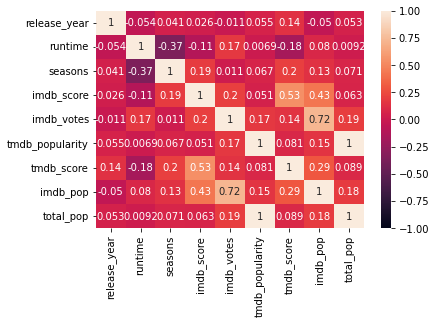

In [984]:
# 상관관계 heatmap 

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [985]:
# 상위 imdb 10% 정렬

# 정렬 
imdb_top_10=df.nlargest(1806,"imdb_pop")


In [986]:
# 상위 tmdb 10% 정렬
tmdb_top_10=df.nlargest(1806,"tmdb_popularity")
tmdb_top_10

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
11235,ts219003,Moon Knight,SHOW,"When Steven Grant, a mild-mannered gift-shop e...",2022,TV-14,48,"['action', 'scifi', 'drama', 'fantasy', 'horro...",['US'],1.0,tt10234724,7.500000,128362.000000,9323.832,8.5,Hulu,6.974728,92.222316
19967,ts43075,Halo,SHOW,Depicting an epic 26th-century conflict betwee...,2022,TV-14,52,"['scifi', 'thriller', 'war', 'action']",['US'],1.0,tt2934286,7.100000,31375.000000,4579.160,8.7,Paramount,6.507374,45.190495
23055,tm244142,The Batman,MOVIE,"In his second year of fighting crime, Batman u...",2022,PG-13,176,"['thriller', 'crime', 'drama', 'scifi', 'action']",['US'],0.0,tt1877830,8.000000,456054.000000,4447.894,7.8,Netflix,7.688603,44.025012
11239,tm375923,Turning Red,MOVIE,Thirteen-year-old Mei is experiencing the awkw...,2022,PG,100,"['fantasy', 'comedy', 'family', 'animation']",['US'],0.0,tt8097030,7.000000,90356.000000,2331.811,7.4,AmazonPrime,6.640396,22.953796
10778,tm123360,Doctor Strange,MOVIE,"After his career is destroyed, a brilliant but...",2016,PG-13,115,"['fantasy', 'action', 'scifi']",['US'],0.0,tt1211837,7.500000,697884.000000,2286.312,7.4,Netflix,7.347567,22.583653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,ts38718,Slasher,SHOW,"Thirty years ago, in the sleepy community of W...",2016,TV-MA,46,"['crime', 'drama', 'horror', 'thriller']",['CA'],4.0,tt4667888,6.700000,14321.000000,33.199,6.6,AmazonPrime,6.374088,0.164145
10176,ts20968,Spider-Man Unlimited,SHOW,Spider-Man travels to Counter-Earth to rescue ...,1999,TV-Y7,22,"['action', 'crime', 'family', 'scifi', 'thrill...",['US'],1.0,tt0207120,6.300000,3326.000000,33.194,7.5,AmazonPrime,6.328510,0.158917
21225,tm85941,The Butterfly Effect,MOVIE,A young man struggles to access sublimated chi...,2004,R,113,"['thriller', 'drama', 'scifi']","['CA', 'US']",0.0,tt0289879,7.600000,479961.000000,33.173,7.5,Hulu,7.372851,0.277383
10467,tm305209,Cars Toon Mater's Tall Tales,MOVIE,Mater the tow truck travels from country to co...,2010,G,35,"['animation', 'family', 'comedy']",['US'],0.0,NaN,6.323011,25792.705058,33.155,6.6,AmazonPrime,6.328149,0.158489


In [987]:
# imdb 

#df2 =pd.read_csv("./Data_bob/titles.csv")

In [988]:
#df2.head()

In [989]:
#plat_idx = df2["platform"].value_counts().index
#plat_val = df2["platform"].value_counts().values
#plt.pie(plat_val,labels=plat_idx,autopct="%.1f%%")
#plt.show()

In [990]:
import re 

for i in temp_g:
    if len(re.findall("HBO",i))>0:
        imdb_top_10["HBO"]=imdb_top_10["platform"].apply(lambda x: 1 if "HBO" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
        tmdb_top_10["HBO"]=imdb_top_10["platform"].apply(lambda x: 1 if "HBO" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
    
    if len(re.findall("Hulu",i))>0:
        imdb_top_10["Hulu"]=imdb_top_10["platform"].apply(lambda x: 1 if "Hulu" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
        tmdb_top_10["Hulu"]=imdb_top_10["platform"].apply(lambda x: 1 if "Hulu" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
    
    if len(re.findall("AmazonPrime",i))>0:
        imdb_top_10["AmazonPrime"]=imdb_top_10["platform"].apply(lambda x: 1 if "AmazonPrime" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
        tmdb_top_10["AmazonPrime"]=imdb_top_10["platform"].apply(lambda x: 1 if "AmazonPrime" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
    
    if len(re.findall("Netflix",i))>0:
        imdb_top_10["Netflix"]=imdb_top_10["platform"].apply(lambda x: 1 if "Netflix" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
        tmdb_top_10["Netflix"]=imdb_top_10["platform"].apply(lambda x: 1 if "Netflix" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
    
    if len(re.findall("Disney",i))>0:
        imdb_top_10["Disney"]=imdb_top_10["platform"].apply(lambda x: 1 if "Disney" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
        tmdb_top_10["Disney"]=imdb_top_10["platform"].apply(lambda x: 1 if "Disney" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
    
    if len(re.findall("Paramount",i))>0:
        imdb_top_10["Paramount"]=imdb_top_10["platform"].apply(lambda x: 1 if "Paramount" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
        tmdb_top_10["Paramount"]=imdb_top_10["platform"].apply(lambda x: 1 if "Paramount" in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기
    
    
    
        
    
    

In [991]:
imdb_top_10

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,tmdb_score,platform,imdb_pop,total_pop,Disney,HBO,AmazonPrime,Paramount,Netflix,Hulu
11622,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'crime', 'thriller']",['US'],5.0,...,8.790,Netflix,9.323833,3.674202,0,0,0,0,1,0
20806,tm119206,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,R,142,"['crime', 'drama']",['US'],0.0,...,8.700,Netflix,9.182990,0.810328,0,0,0,0,1,0
21787,ts2,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,TV-MA,58,"['scifi', 'action', 'drama', 'fantasy', 'roman...",['US'],8.0,...,8.400,Netflix,9.056374,5.012702,0,0,0,0,1,0
17805,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,R,175,"['drama', 'crime']",['US'],0.0,...,8.700,Hulu,9.040889,0.750159,0,0,0,0,0,1
22612,ts88632,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,TV-MA,65,"['drama', 'history', 'thriller', 'documentation']",['US'],1.0,...,8.600,AmazonPrime,8.998181,0.772327,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,tm194887,Meru,MOVIE,Meru is the electrifying story of three elite ...,2015,R,89,"['action', 'documentation', 'sport']",['US'],0.0,...,7.400,Disney,6.521152,-0.024161,1,0,0,0,0,0
13445,ts75355,Suburra: Blood on Rome,SHOW,"In 2008, a fight over land in a seaside town n...",2017,TV-MA,48,"['drama', 'action', 'crime', 'european']",['IT'],3.0,...,7.463,HBO,6.521140,0.084426,0,1,0,0,0,0
2921,tm23119,The Namesake,MOVIE,"After moving from Calcutta to New York, member...",2006,PG-13,122,['drama'],"['IN', 'US']",0.0,...,6.700,HBO,6.521119,-0.090701,0,1,0,0,0,0
22606,ts87692,Gentleman Jack,SHOW,"Halifax, West Yorkshire, England, 1832. Anne L...",2019,TV-MA,59,"['drama', 'history', 'romance']","['GB', 'US']",2.0,...,8.100,Netflix,6.520954,0.257045,0,0,0,0,1,0


In [992]:
df[df['platform'] == 'AmazonPrime'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime,6.853391,0.001484
11,tm88001,The Stranger,MOVIE,A man working for the War Crimes Commission su...,1946,Not Rated,95,"['thriller', 'crime', 'drama']",['US'],0.0,tt0038991,7.3,26293.0,7.566,7.3,AmazonPrime,6.524554,-0.072558
13,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"['drama', 'crime']",['US'],0.0,tt0028346,3.7,8617.0,5.412,4.1,AmazonPrime,6.129087,-0.138825
14,tm2838,The Most Dangerous Game,MOVIE,When legendary hunter Bob Rainsford is shipwre...,1932,Not Rated,63,"['thriller', 'horror', 'action']",['US'],0.0,tt0023238,7.1,12203.0,8.828,7.0,AmazonPrime,6.410004,-0.073079
16,tm3781,The Woman in the Window,MOVIE,A seductive woman gets an innocent professor m...,1944,Not Rated,99,"['drama', 'thriller', 'crime']",['US'],0.0,tt0037469,7.6,15909.0,6.018,7.5,AmazonPrime,6.497314,-0.090981


In [993]:
df[df['platform'] == 'Hulu'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Not Rated,96,"['western', 'drama']",['US'],0.0,tt0031971,7.8,48149.0,11.786,7.7,Hulu,6.793320,-0.000233
26,tm162994,Made for Each Other,MOVIE,A couple struggle to find happiness after a wh...,1939,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0031602,6.3,3582.0,6.242,6.1,Hulu,6.328443,-0.107953
27,tm2721,The Thief of Bagdad,MOVIE,A recalcitrant thief vies with a duplicitous M...,1924,Not Rated,149,"['romance', 'family', 'fantasy']",['US'],0.0,tt0015400,7.7,6134.0,7.166,7.4,Hulu,6.405419,-0.090057
50,tm108119,Hangmen Also Die!,MOVIE,"During the Nazi occupation of Czechoslovakia, ...",1943,Not Rated,134,"['thriller', 'war', 'drama']",['US'],0.0,tt0035966,7.4,5442.0,6.772,7.0,Hulu,6.382418,-0.096571
64,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,Not Rated,79,"['thriller', 'crime']",['US'],0.0,tt0040427,7.1,5943.0,5.253,6.7,Hulu,6.370889,-0.112922


In [994]:
# imdb top 10 gen

plat_idbdm={}
plat_tmdb={}
new_plat_list = ["HBO","Hulu","AmazonPrime","Netflix","Disney","Paramount"]

for plat in new_plat_list:
    
    plat_idbdm[plat] = imdb_top_10[plat].sum()



for plat in new_plat_list:
    plat_tmdb[plat] = tmdb_top_10[plat].sum()


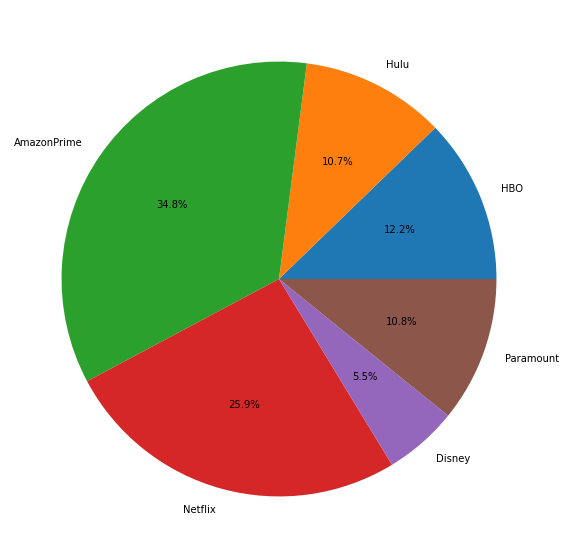

In [995]:
plt.figure(figsize=(15,10))
imdb__plat=pd.DataFrame.from_dict(plat_idbdm,orient="index").T

plt.pie(imdb__plat.values[0],labels=imdb__plat.columns,autopct="%.1f%%")
plt.show()

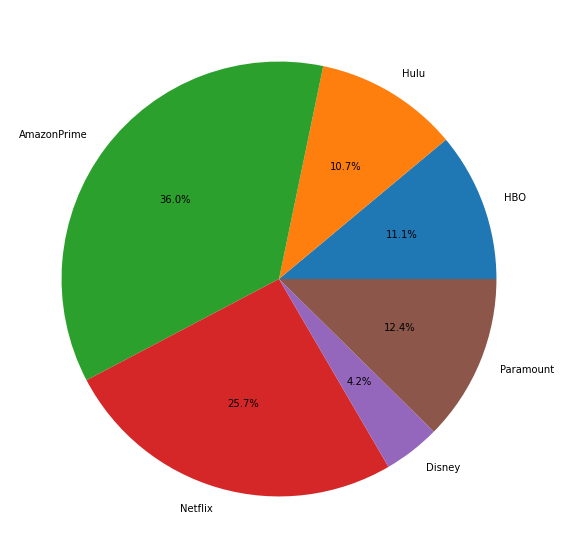

In [996]:
plt.figure(figsize=(15,10))
tmdb__plat=pd.DataFrame.from_dict(plat_tmdb,orient="index").T

plt.pie(tmdb__plat.values[0],labels=tmdb__plat.columns,autopct="%.1f%%")
plt.show()

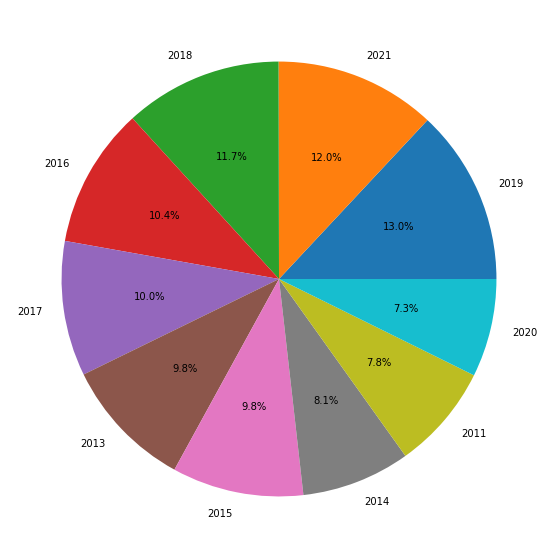

In [997]:
plt.figure(figsize=(15,10))
count_year_idx=imdb_top_10['release_year'].value_counts().index[:10]
count_year_val=imdb_top_10['release_year'].value_counts().values[:10]

plt.pie(count_year_val,labels=count_year_idx,autopct="%.1f%%")
plt.show()

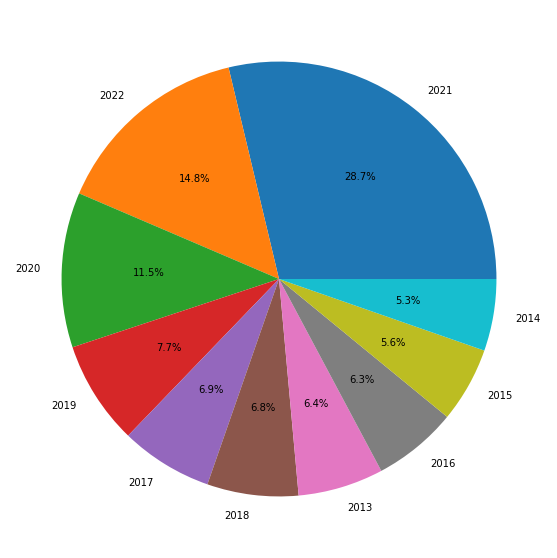

In [998]:
plt.figure(figsize=(15,10))
count_year_idx=tmdb_top_10['release_year'].value_counts().index[:10]
count_year_val=tmdb_top_10['release_year'].value_counts().values[:10]

plt.pie(count_year_val,labels=count_year_idx,autopct="%.1f%%")
plt.show()

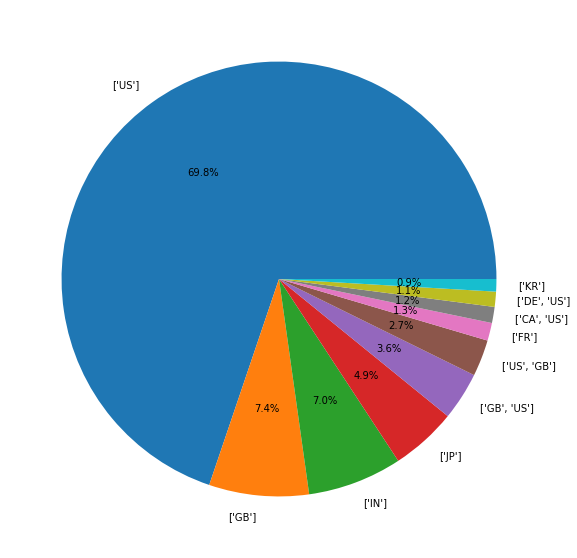

In [999]:
plt.figure(figsize=(15,10))
count_coutry_idx=imdb_top_10['production_countries'].value_counts().index[:10]
count_coutry_val=imdb_top_10['production_countries'].value_counts().values[:10]
plt.pie(count_coutry_val,labels=count_coutry_idx,autopct="%.1f%%")
plt.show()

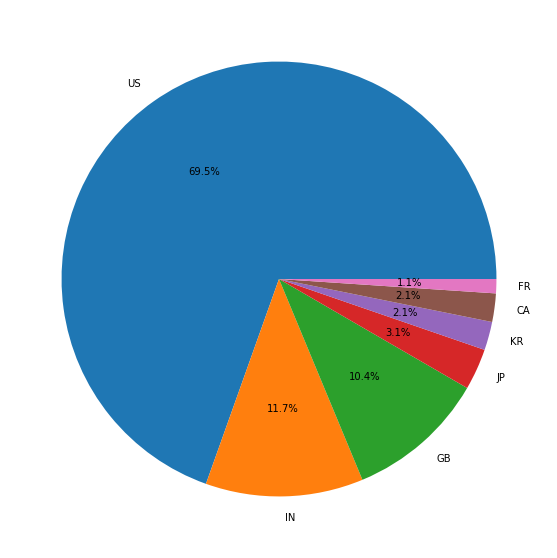

In [1000]:
plt.figure(figsize=(15,10))
count_val2=[72.4,12.2,10.8,3.2,2.2,2.2,1.1]
count_idx2=["US", "IN", "GB", "JP", "KR", "CA", "FR" ]
plt.pie(count_val2,labels=count_idx2,autopct="%.1f%%")
plt.show()

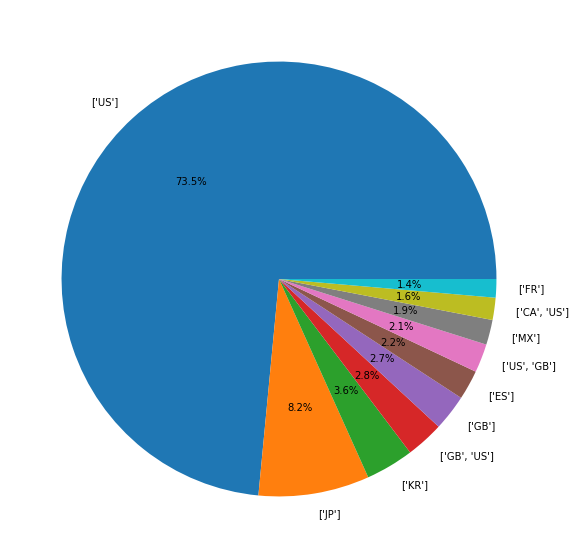

In [1001]:
# tmdb pie country
plt.figure(figsize=(15,10))
count_coutry_idx=tmdb_top_10['production_countries'].value_counts().index[:10]
count_coutry_val=tmdb_top_10['production_countries'].value_counts().values[:10]
plt.pie(count_coutry_val,labels=count_coutry_idx,autopct="%.1f%%")
plt.show()

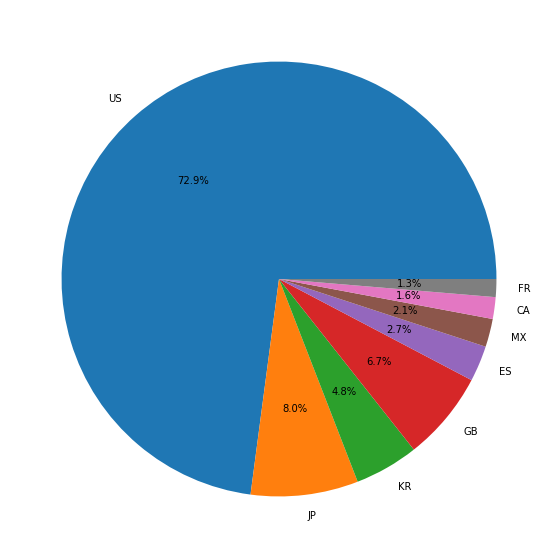

In [1002]:
plt.figure(figsize=(15,10))
count_val2=[76.7,8.4,5.0,7,2.8,2.2,1.7,1.4]
count_idx2=["US", "JP", "KR", "GB", "ES", "MX", "CA","FR" ]
plt.pie(count_val2,labels=count_idx2,autopct="%.1f%%")
plt.show()

In [1003]:
df[df['platform'] == 'AmazonPrime'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime,6.853391,0.001484
11,tm88001,The Stranger,MOVIE,A man working for the War Crimes Commission su...,1946,Not Rated,95,"['thriller', 'crime', 'drama']",['US'],0.0,tt0038991,7.3,26293.0,7.566,7.3,AmazonPrime,6.524554,-0.072558
13,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"['drama', 'crime']",['US'],0.0,tt0028346,3.7,8617.0,5.412,4.1,AmazonPrime,6.129087,-0.138825
14,tm2838,The Most Dangerous Game,MOVIE,When legendary hunter Bob Rainsford is shipwre...,1932,Not Rated,63,"['thriller', 'horror', 'action']",['US'],0.0,tt0023238,7.1,12203.0,8.828,7.0,AmazonPrime,6.410004,-0.073079
16,tm3781,The Woman in the Window,MOVIE,A seductive woman gets an innocent professor m...,1944,Not Rated,99,"['drama', 'thriller', 'crime']",['US'],0.0,tt0037469,7.6,15909.0,6.018,7.5,AmazonPrime,6.497314,-0.090981


In [1004]:
df[df['platform'] == 'Hulu'].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Not Rated,96,"['western', 'drama']",['US'],0.0,tt0031971,7.8,48149.0,11.786,7.7,Hulu,6.793320,-0.000233
26,tm162994,Made for Each Other,MOVIE,A couple struggle to find happiness after a wh...,1939,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0031602,6.3,3582.0,6.242,6.1,Hulu,6.328443,-0.107953
27,tm2721,The Thief of Bagdad,MOVIE,A recalcitrant thief vies with a duplicitous M...,1924,Not Rated,149,"['romance', 'family', 'fantasy']",['US'],0.0,tt0015400,7.7,6134.0,7.166,7.4,Hulu,6.405419,-0.090057
50,tm108119,Hangmen Also Die!,MOVIE,"During the Nazi occupation of Czechoslovakia, ...",1943,Not Rated,134,"['thriller', 'war', 'drama']",['US'],0.0,tt0035966,7.4,5442.0,6.772,7.0,Hulu,6.382418,-0.096571
64,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,Not Rated,79,"['thriller', 'crime']",['US'],0.0,tt0040427,7.1,5943.0,5.253,6.7,Hulu,6.370889,-0.112922


In [1005]:
# 장르 나누고 시각화 하기 [영화 ,show]
import re


#f = lambda x : re.findall("\w+",x)
#type(f(df.iloc[0]["genres"])) -> list 

imdb_top_10["genres"] =imdb_top_10["genres"].apply(lambda x : re.findall("\w+",x))
tmdb_top_10["genres"] =tmdb_top_10["genres"].apply(lambda x : re.findall("\w+",x))

genres_list = list(imdb_top_10["genres"].values)
genres_list2 = list(tmdb_top_10["genres"].values)

new_genres_list =[]
new_genres_list2 =[]

for sublist in genres_list:
    for item in sublist:
        new_genres_list.append(item)

for sublist in genres_list2:
    for item in sublist:
        new_genres_list2.append(item)



new_genres_list = set(new_genres_list)
new_genres_list2 = set(new_genres_list2)

for i,genre in enumerate(new_genres_list):
    imdb_top_10[genre]=imdb_top_10["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

for i,genre in enumerate(new_genres_list2):
    tmdb_top_10[genre]=tmdb_top_10["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

    
imdb_top_10.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'platform', 'imdb_pop', 'total_pop', 'Disney', 'HBO',
       'AmazonPrime', 'Paramount', 'Netflix', 'Hulu', 'history', 'war',
       'action', 'documentation', 'family', 'music', 'crime', 'scifi',
       'animation', 'sport', 'romance', 'thriller', 'horror', 'western',
       'fantasy', 'reality', 'european', 'comedy', 'drama'],
      dtype='object')

In [1006]:
imdb_top_10

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
11622,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"[drama, crime, thriller]",['US'],5.0,...,0,0,1,0,0,0,0,0,0,1
20806,tm119206,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,R,142,"[crime, drama]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
21787,ts2,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,TV-MA,58,"[scifi, action, drama, fantasy, romance]",['US'],8.0,...,0,1,0,0,0,1,0,0,0,1
17805,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,R,175,"[drama, crime]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
22612,ts88632,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,TV-MA,65,"[drama, history, thriller, documentation]",['US'],1.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,tm194887,Meru,MOVIE,Meru is the electrifying story of three elite ...,2015,R,89,"[action, documentation, sport]",['US'],0.0,...,1,0,0,0,0,0,0,0,0,0
13445,ts75355,Suburra: Blood on Rome,SHOW,"In 2008, a fight over land in a seaside town n...",2017,TV-MA,48,"[drama, action, crime, european]",['IT'],3.0,...,0,0,0,0,0,0,0,1,0,1
2921,tm23119,The Namesake,MOVIE,"After moving from Calcutta to New York, member...",2006,PG-13,122,[drama],"['IN', 'US']",0.0,...,0,0,0,0,0,0,0,0,0,1
22606,ts87692,Gentleman Jack,SHOW,"Halifax, West Yorkshire, England, 1832. Anne L...",2019,TV-MA,59,"[drama, history, romance]","['GB', 'US']",2.0,...,0,1,0,0,0,0,0,0,0,1


In [1007]:
new_genres_list

{'action',
 'animation',
 'comedy',
 'crime',
 'documentation',
 'drama',
 'european',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'reality',
 'romance',
 'scifi',
 'sport',
 'thriller',
 'war',
 'western'}

In [1008]:
# imdb top 10 genre


genre_idbdm={}
genre_tmdb={}


for genre in new_genres_list:
    
    genre_idbdm[genre] = imdb_top_10[genre].sum()



for genre in new_genres_list:
    genre_tmdb[genre] = tmdb_top_10[genre].sum()




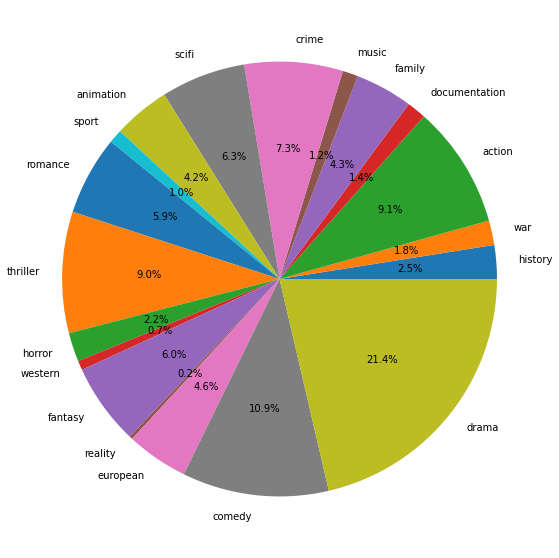

In [1009]:
plt.figure(figsize=(15,10))
imdb_genres=pd.DataFrame.from_dict(genre_idbdm,orient="index").T
imdb_genres.values[0]


plt.pie(imdb_genres.values[0],labels=imdb_genres.columns,autopct="%.1f%%")
plt.show()

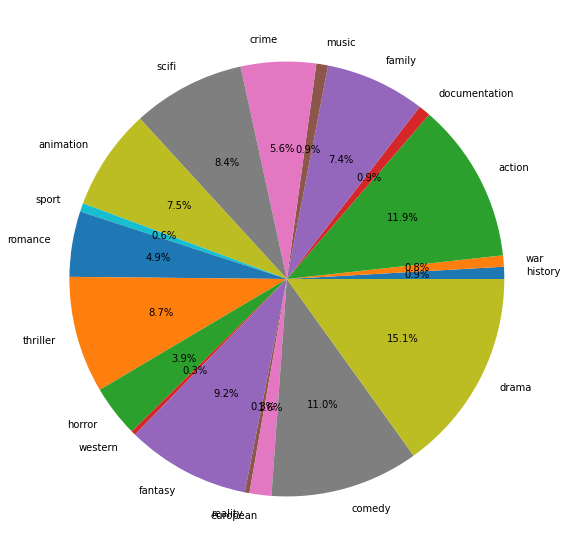

In [1010]:
plt.figure(figsize=(15,10))
tmdb_genres=pd.DataFrame.from_dict(genre_tmdb,orient="index").T
tmdb_genres.values[0]


plt.pie(tmdb_genres.values[0],labels=tmdb_genres.columns,autopct="%.1f%%")
plt.show()

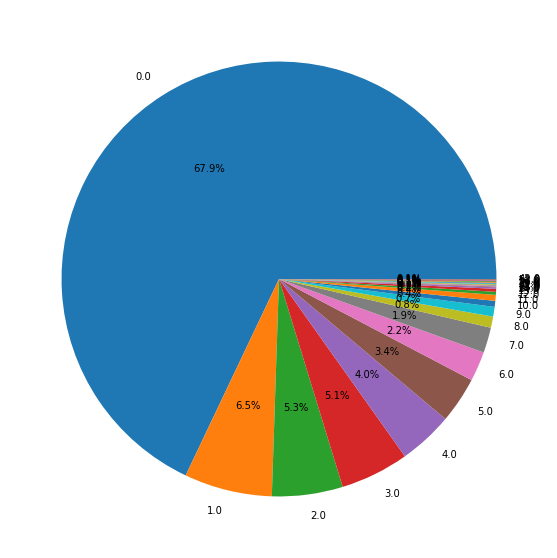

In [1011]:
#imdb pie season
plt.figure(figsize=(15,10))
plt.pie(imdb_top_10["seasons"].value_counts().values,labels=imdb_top_10["seasons"].value_counts().index,autopct="%.1f%%")
plt.show()

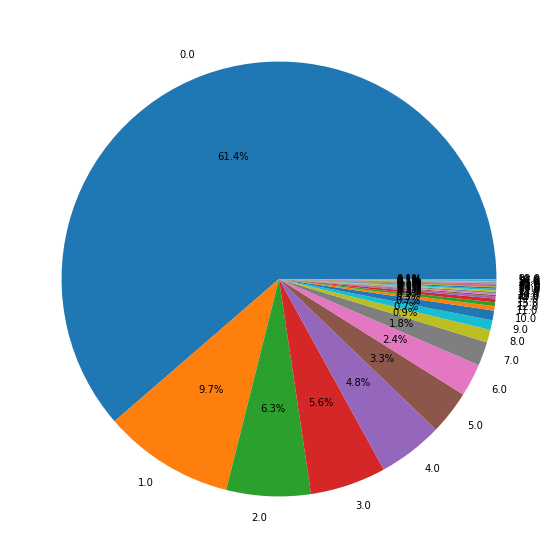

In [1012]:
#tmdb pie season
plt.figure(figsize=(15,10))
plt.pie(tmdb_top_10["seasons"].value_counts().values,labels=tmdb_top_10["seasons"].value_counts().index,autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

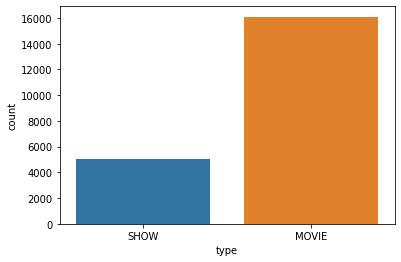

In [1013]:
# movie show 시각화 
sns.countplot(data=df,x="type")


<AxesSubplot:xlabel='age_certification', ylabel='count'>

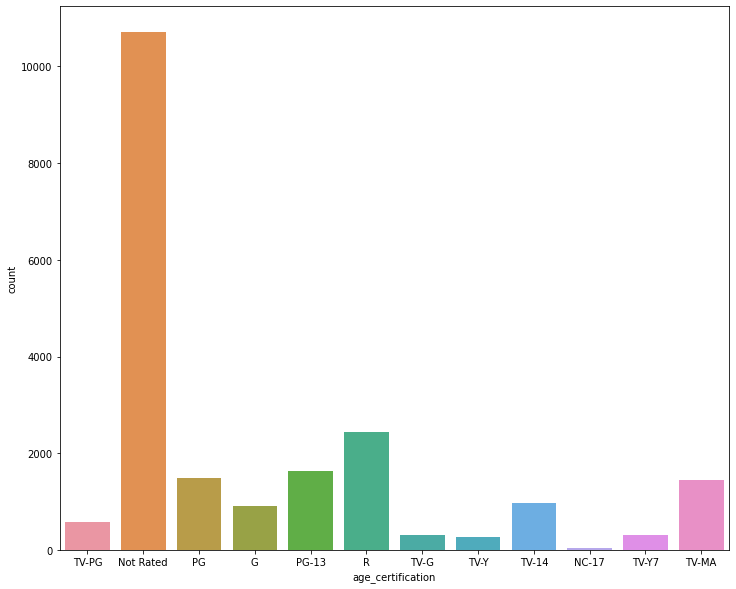

In [1014]:
# age_criteran 시각화 
plt.figure(figsize=(12,10))
sns.countplot(data=df,x="age_certification")


In [1015]:
# 장르 나누고 시각화 하기 [영화 ,show]
import re


#f = lambda x : re.findall("\w+",x)
#type(f(df.iloc[0]["genres"])) -> list 

df["genres"] =df["genres"].apply(lambda x : re.findall("\w+",x))
genres_list = list(df["genres"].values)

new_genres_list =[]
for sublist in genres_list:
    for item in sublist:
        new_genres_list.append(item)



new_genres_list = set(new_genres_list)

for i,genre in enumerate(new_genres_list):
    df[genre]=df["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

    
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,...,0,0,0,1,0,1,0,0,1,0
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"[action, drama, war, western, comedy, european]",['US'],0.0,...,0,0,0,0,1,0,0,1,1,1
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"[romance, war, drama]",['US'],0.0,...,0,1,0,0,0,0,0,0,0,1
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"[comedy, drama, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,1,1
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"[thriller, drama, romance]",['US'],0.0,...,0,1,1,0,0,0,0,0,0,1


In [1016]:
# 시각화 위한 전처리 

# 영화중에서 각 장르별 개수 센다 
genre_movie_dict = {}

for genre in new_genres_list:
    genre_movie_dict[genre] = df.query("type == 'MOVIE'")[genre].sum()

genre_movie_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))

# show중에서 장르별 개수 센다 
genre_series_dict = {}

for genre in new_genres_list:
    genre_series_dict[genre] = df.query("type == 'SHOW'")[genre].sum()

genre_series_dict = dict(sorted(genre_series_dict.items(), key=lambda x: x[0]))




In [1017]:
genre_all_dict = {}

for genre in new_genres_list:
    genre_all_dict[genre] = df[genre].sum()

genre_all_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))


<AxesSubplot:>

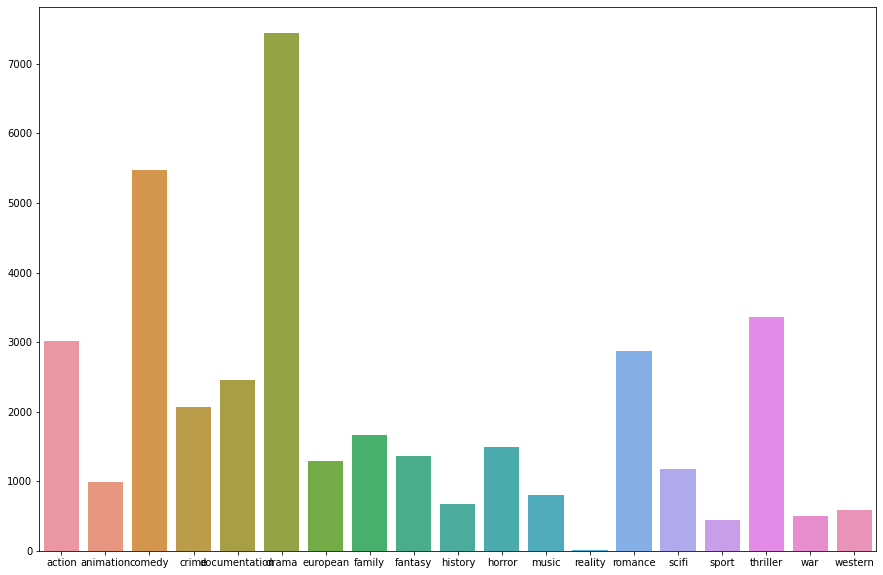

In [1018]:
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_all_dict,orient="index").T
sns.barplot(data=movie_genres)

<AxesSubplot:>

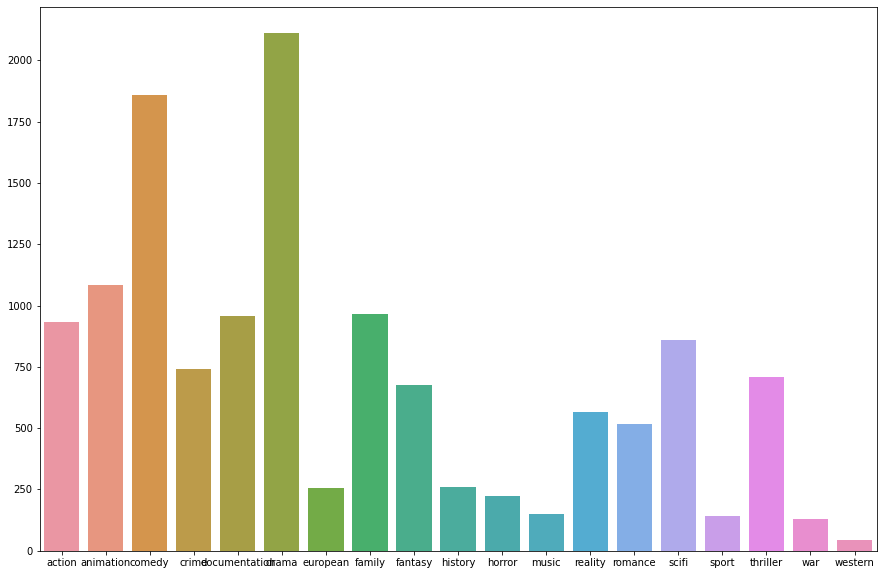

In [1019]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genres=pd.DataFrame.from_dict(genre_series_dict,orient="index").T
sns.barplot(data=show_genres)

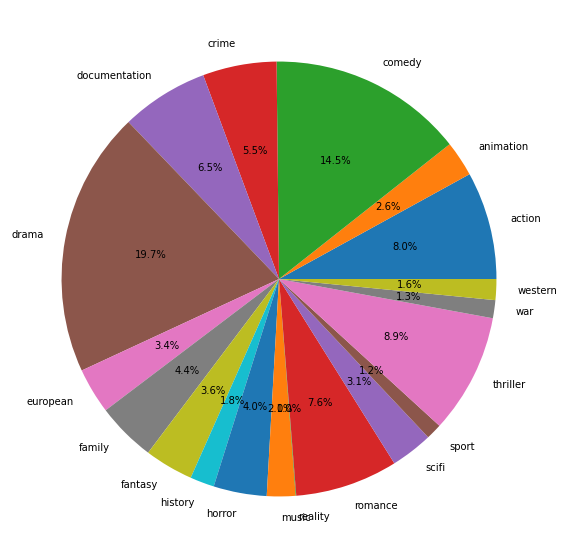

In [1020]:
# all
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_all_dict,orient="index").T

plt.pie(movie_genres.values[0],labels=movie_genres.columns,autopct="%.1f%%")
plt.show()

In [1021]:
# 장르별 ibdm score 시각화 하기 -> 평균값으로 했다 

genre_movie_idbdm={}
genre_show_idbdm={}

for i,genre in enumerate(new_genres_list):
    genre_movie_idbdm[genre] = df[df["type"]=="MOVIE"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)

    
    
for i,genre in enumerate(new_genres_list):
    genre_show_idbdm[genre] = df[df["type"]=="SHOW"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)
    



<AxesSubplot:>

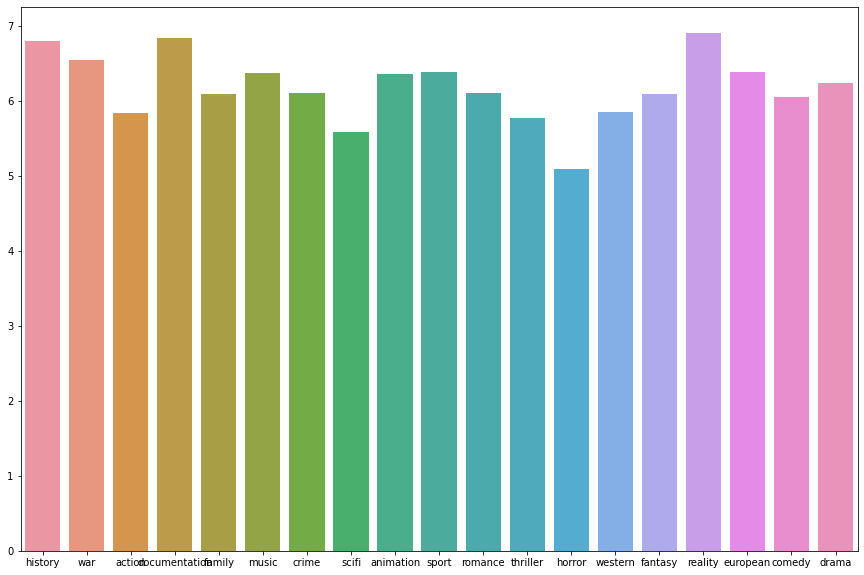

In [1022]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genr=pd.DataFrame.from_dict(genre_movie_idbdm,orient="index").T
sns.barplot(data=movie_genr)

<AxesSubplot:>

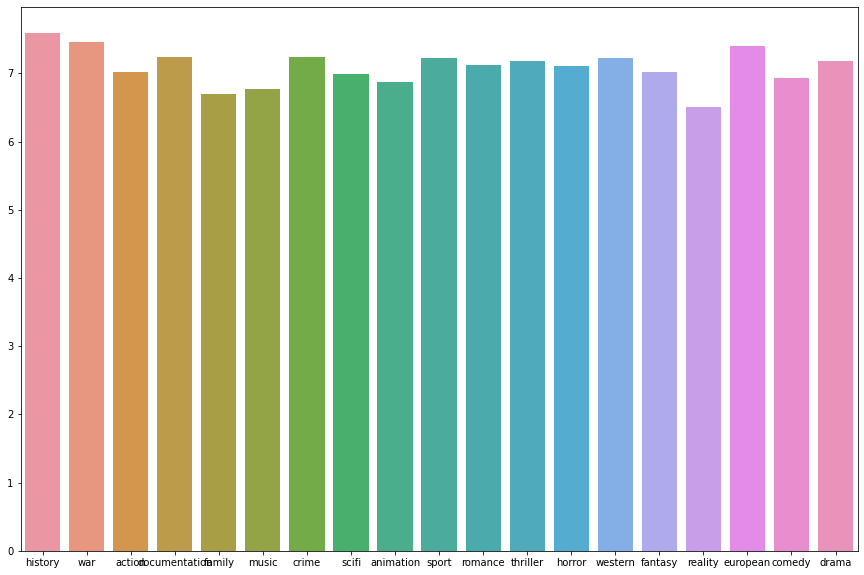

In [1023]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genr=pd.DataFrame.from_dict(genre_show_idbdm,orient="index").T
sns.barplot(data=show_genr)

In [1024]:
df['production_countries'].value_counts().index[:20]

Index(['['US']', '['IN']', '['GB']', '[]', '['JP']', '['CA']', '['FR']',
       '['KR']', '['ES']', '['AU']', '['GB', 'US']', '['CA', 'US']', '['CN']',
       '['MX']', '['DE']', '['XX']', '['IT']', '['BR']', '['US', 'GB']',
       '['US', 'CA']'],
      dtype='object')

<AxesSubplot:xlabel='production_countries', ylabel='count'>

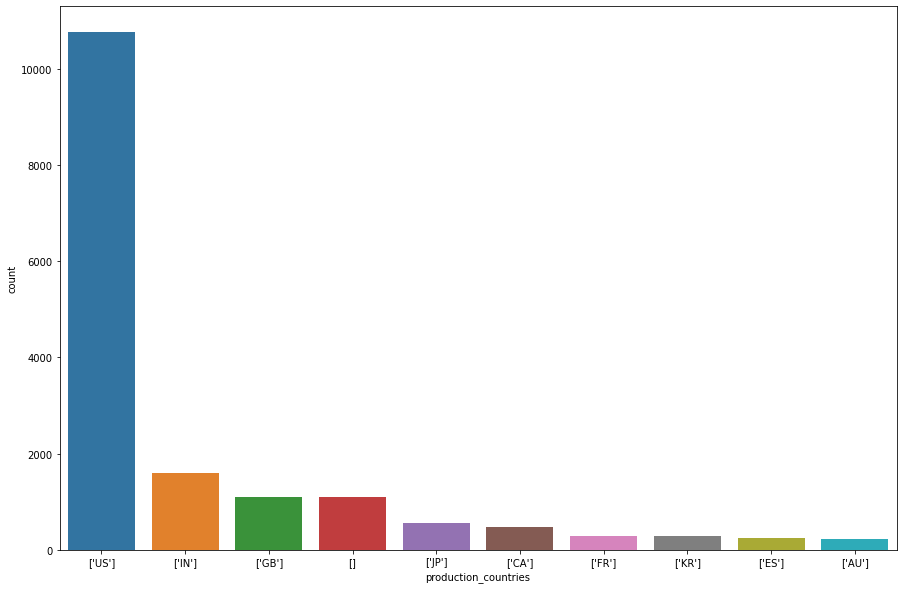

In [1025]:
# 나라별 시각화 

plt.figure(figsize=(15,10))

sns.countplot(data=df,x="production_countries",order = df['production_countries'].value_counts().index[:10]) 
# 각 독립적인 나라별로만 시각화 한것이다


In [1026]:
imdb_top_10

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
11622,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"[drama, crime, thriller]",['US'],5.0,...,0,0,1,0,0,0,0,0,0,1
20806,tm119206,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,R,142,"[crime, drama]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
21787,ts2,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,TV-MA,58,"[scifi, action, drama, fantasy, romance]",['US'],8.0,...,0,1,0,0,0,1,0,0,0,1
17805,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,R,175,"[drama, crime]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
22612,ts88632,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,TV-MA,65,"[drama, history, thriller, documentation]",['US'],1.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,tm194887,Meru,MOVIE,Meru is the electrifying story of three elite ...,2015,R,89,"[action, documentation, sport]",['US'],0.0,...,1,0,0,0,0,0,0,0,0,0
13445,ts75355,Suburra: Blood on Rome,SHOW,"In 2008, a fight over land in a seaside town n...",2017,TV-MA,48,"[drama, action, crime, european]",['IT'],3.0,...,0,0,0,0,0,0,0,1,0,1
2921,tm23119,The Namesake,MOVIE,"After moving from Calcutta to New York, member...",2006,PG-13,122,[drama],"['IN', 'US']",0.0,...,0,0,0,0,0,0,0,0,0,1
22606,ts87692,Gentleman Jack,SHOW,"Halifax, West Yorkshire, England, 1832. Anne L...",2019,TV-MA,59,"[drama, history, romance]","['GB', 'US']",2.0,...,0,1,0,0,0,0,0,0,0,1


In [1027]:
# imdb top 10 gen

plat_idbdm={}
plat_tmdb={}
new_plat_list = ["HBO","Hulu","AmazonPrime","Netflix","Disney","Paramount"]

for plat in new_plat_list:
    
    plat_idbdm[plat] = imdb_top_10[plat].sum()



for plat in new_plat_list:
    plat_tmdb[plat] = tmdb_top_10[plat].sum()


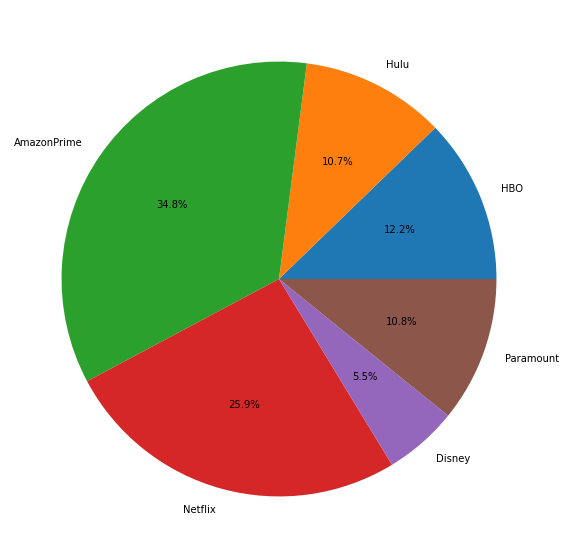

In [1028]:
plt.figure(figsize=(15,10))
imdb__plat=pd.DataFrame.from_dict(plat_idbdm,orient="index").T

plt.pie(imdb__plat.values[0],labels=imdb__plat.columns,autopct="%.1f%%")
plt.show()

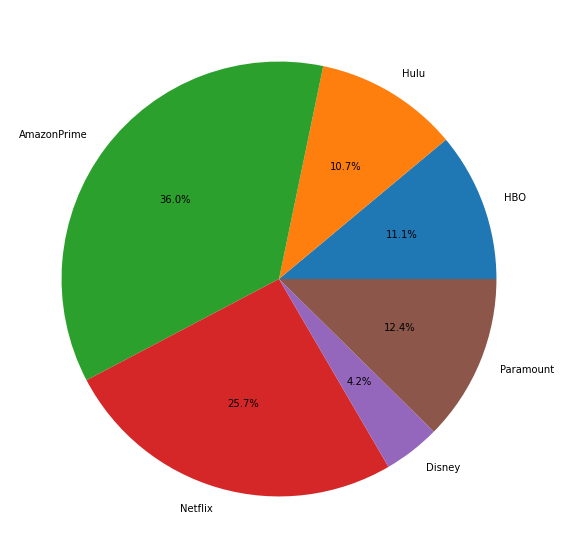

In [1029]:
plt.figure(figsize=(15,10))
tmdb__plat=pd.DataFrame.from_dict(plat_tmdb,orient="index").T

plt.pie(tmdb__plat.values[0],labels=tmdb__plat.columns,autopct="%.1f%%")
plt.show()

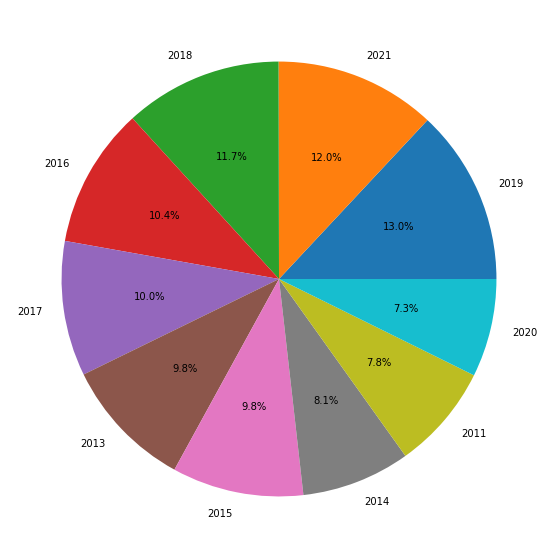

In [1030]:
plt.figure(figsize=(15,10))
count_year_idx=imdb_top_10['release_year'].value_counts().index[:10]
count_year_val=imdb_top_10['release_year'].value_counts().values[:10]

plt.pie(count_year_val,labels=count_year_idx,autopct="%.1f%%")
plt.show()

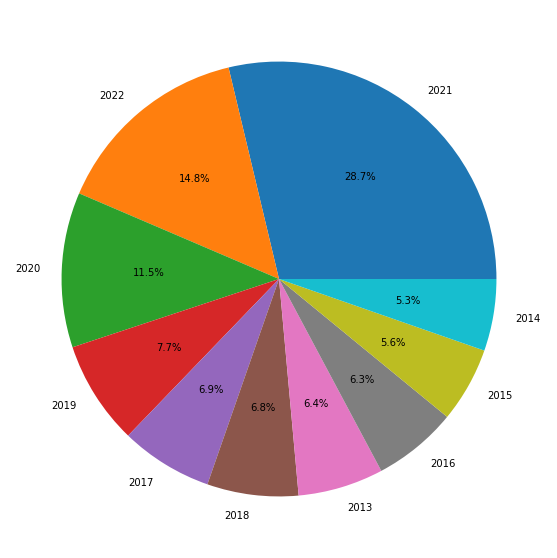

In [1031]:
plt.figure(figsize=(15,10))
count_year_idx=tmdb_top_10['release_year'].value_counts().index[:10]
count_year_val=tmdb_top_10['release_year'].value_counts().values[:10]

plt.pie(count_year_val,labels=count_year_idx,autopct="%.1f%%")
plt.show()

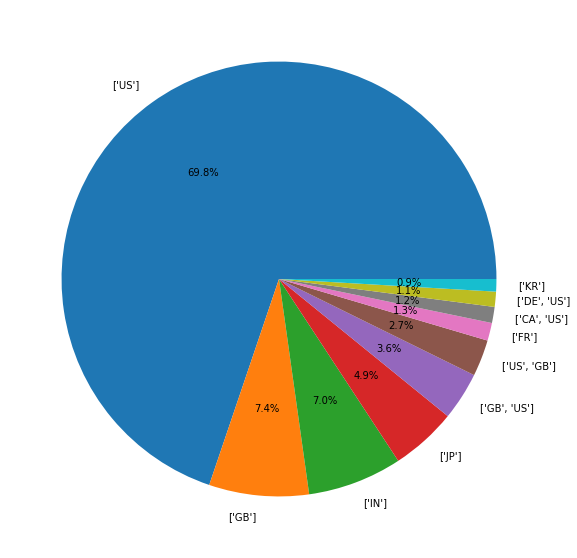

In [1032]:
plt.figure(figsize=(15,10))
count_coutry_idx=imdb_top_10['production_countries'].value_counts().index[:10]
count_coutry_val=imdb_top_10['production_countries'].value_counts().values[:10]
plt.pie(count_coutry_val,labels=count_coutry_idx,autopct="%.1f%%")
plt.show()

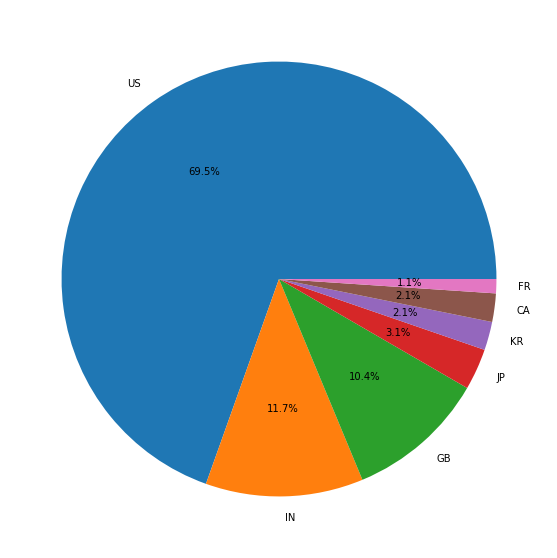

In [1033]:
plt.figure(figsize=(15,10))
count_val2=[72.4,12.2,10.8,3.2,2.2,2.2,1.1]
count_idx2=["US", "IN", "GB", "JP", "KR", "CA", "FR" ]
plt.pie(count_val2,labels=count_idx2,autopct="%.1f%%")
plt.show()

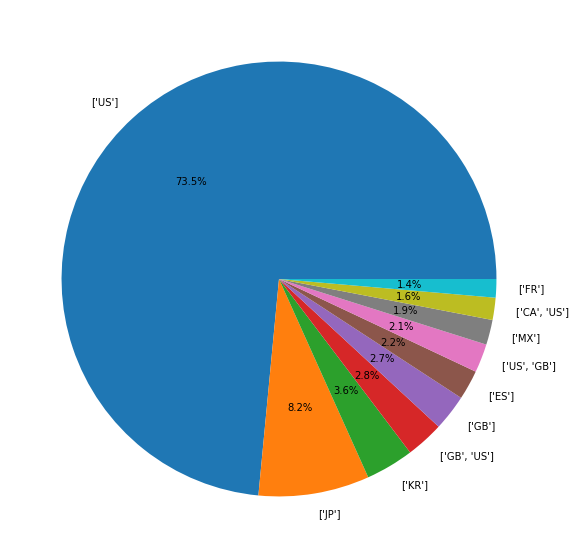

In [1034]:
# tmdb pie country
plt.figure(figsize=(15,10))
count_coutry_idx=tmdb_top_10['production_countries'].value_counts().index[:10]
count_coutry_val=tmdb_top_10['production_countries'].value_counts().values[:10]
plt.pie(count_coutry_val,labels=count_coutry_idx,autopct="%.1f%%")
plt.show()

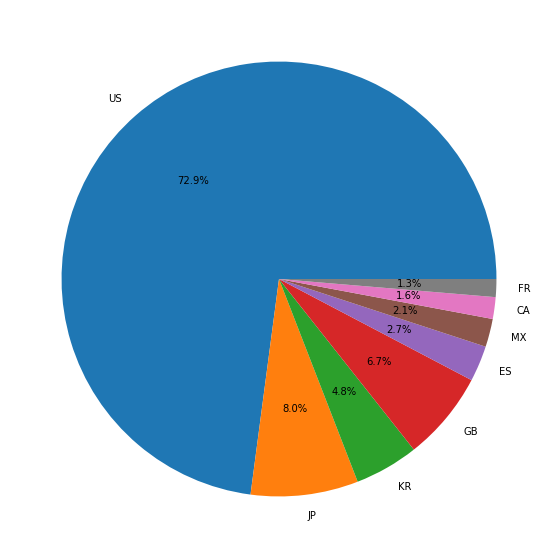

In [1035]:
plt.figure(figsize=(15,10))
count_val2=[76.7,8.4,5.0,7,2.8,2.2,1.7,1.4]
count_idx2=["US", "JP", "KR", "GB", "ES", "MX", "CA","FR" ]
plt.pie(count_val2,labels=count_idx2,autopct="%.1f%%")
plt.show()

In [1036]:
imdb_top_10

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
11622,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"[drama, crime, thriller]",['US'],5.0,...,0,0,1,0,0,0,0,0,0,1
20806,tm119206,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,R,142,"[crime, drama]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
21787,ts2,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,TV-MA,58,"[scifi, action, drama, fantasy, romance]",['US'],8.0,...,0,1,0,0,0,1,0,0,0,1
17805,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,R,175,"[drama, crime]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
22612,ts88632,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,TV-MA,65,"[drama, history, thriller, documentation]",['US'],1.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,tm194887,Meru,MOVIE,Meru is the electrifying story of three elite ...,2015,R,89,"[action, documentation, sport]",['US'],0.0,...,1,0,0,0,0,0,0,0,0,0
13445,ts75355,Suburra: Blood on Rome,SHOW,"In 2008, a fight over land in a seaside town n...",2017,TV-MA,48,"[drama, action, crime, european]",['IT'],3.0,...,0,0,0,0,0,0,0,1,0,1
2921,tm23119,The Namesake,MOVIE,"After moving from Calcutta to New York, member...",2006,PG-13,122,[drama],"['IN', 'US']",0.0,...,0,0,0,0,0,0,0,0,0,1
22606,ts87692,Gentleman Jack,SHOW,"Halifax, West Yorkshire, England, 1832. Anne L...",2019,TV-MA,59,"[drama, history, romance]","['GB', 'US']",2.0,...,0,1,0,0,0,0,0,0,0,1


In [1037]:
new_genres_list

{'action',
 'animation',
 'comedy',
 'crime',
 'documentation',
 'drama',
 'european',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'reality',
 'romance',
 'scifi',
 'sport',
 'thriller',
 'war',
 'western'}

In [1038]:
# imdb top 10 genre


genre_idbdm={}
genre_tmdb={}


for genre in new_genres_list:
    
    genre_idbdm[genre] = imdb_top_10[genre].sum()



for genre in new_genres_list:
    genre_tmdb[genre] = tmdb_top_10[genre].sum()




In [1039]:
df[df['platform']=='AmazonPrime'].head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"[comedy, drama, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,1,1
11,tm88001,The Stranger,MOVIE,A man working for the War Crimes Commission su...,1946,Not Rated,95,"[thriller, crime, drama]",['US'],0.0,...,0,0,1,0,0,0,0,0,0,1
13,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"[drama, crime]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,1
14,tm2838,The Most Dangerous Game,MOVIE,When legendary hunter Bob Rainsford is shipwre...,1932,Not Rated,63,"[thriller, horror, action]",['US'],0.0,...,0,0,1,1,0,0,0,0,0,0
16,tm3781,The Woman in the Window,MOVIE,A seductive woman gets an innocent professor m...,1944,Not Rated,99,"[drama, thriller, crime]",['US'],0.0,...,0,0,1,0,0,0,0,0,0,1


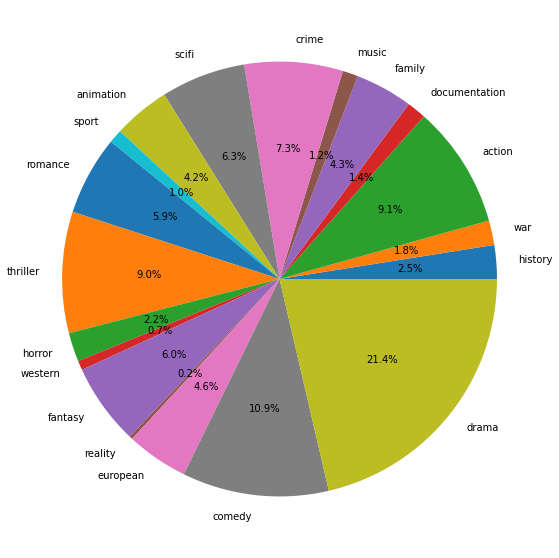

In [1040]:
plt.figure(figsize=(15,10))
imdb_genres=pd.DataFrame.from_dict(genre_idbdm,orient="index").T
imdb_genres.values[0]


plt.pie(imdb_genres.values[0],labels=imdb_genres.columns,autopct="%.1f%%")
plt.show()

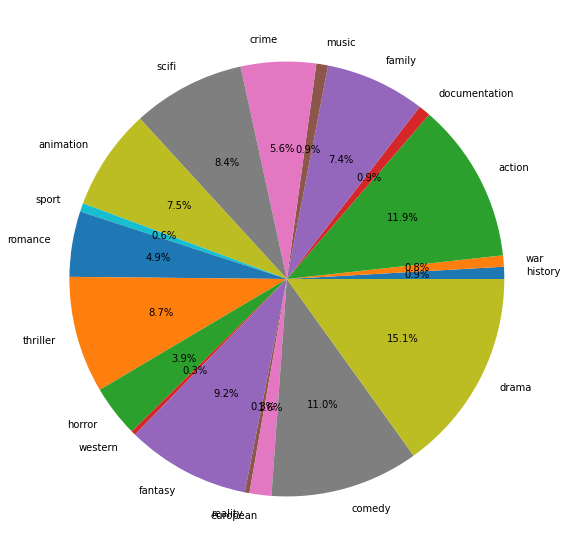

In [1041]:
plt.figure(figsize=(15,10))
tmdb_genres=pd.DataFrame.from_dict(genre_tmdb,orient="index").T
tmdb_genres.values[0]


plt.pie(tmdb_genres.values[0],labels=tmdb_genres.columns,autopct="%.1f%%")
plt.show()

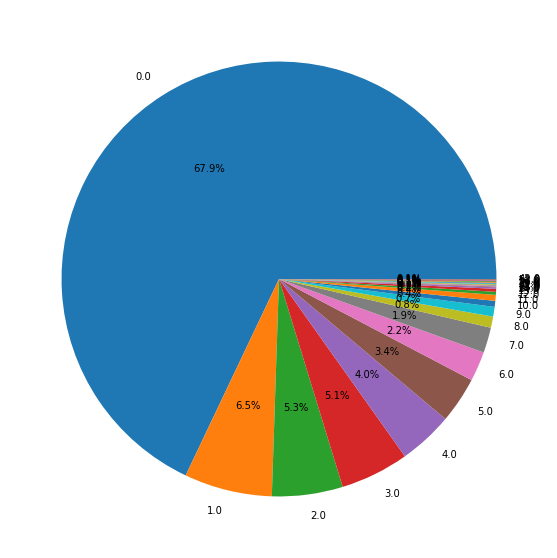

In [1042]:
#imdb pie season
plt.figure(figsize=(15,10))
plt.pie(imdb_top_10["seasons"].value_counts().values,labels=imdb_top_10["seasons"].value_counts().index,autopct="%.1f%%")
plt.show()

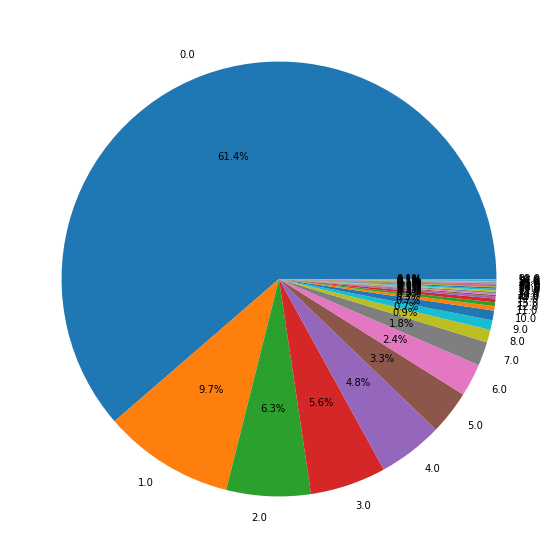

In [1043]:
#tmdb pie season
plt.figure(figsize=(15,10))
plt.pie(tmdb_top_10["seasons"].value_counts().values,labels=tmdb_top_10["seasons"].value_counts().index,autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

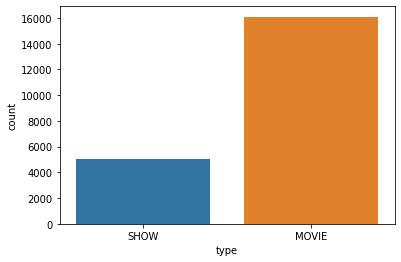

In [1044]:
# movie show 시각화 
sns.countplot(data=df,x="type")


<AxesSubplot:xlabel='age_certification', ylabel='count'>

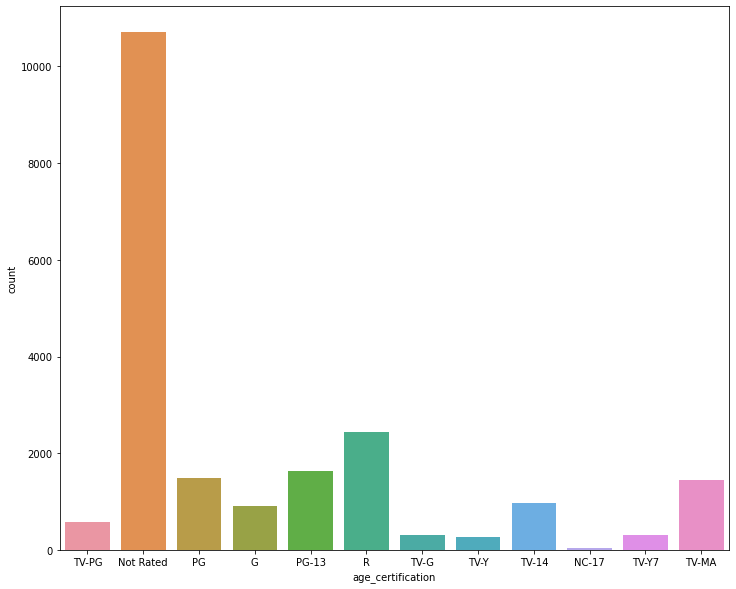

In [1045]:
# age_criteran 시각화 
plt.figure(figsize=(12,10))
sns.countplot(data=df,x="age_certification")


In [1046]:
# 시각화 위한 전처리 

# 영화중에서 각 장르별 개수 센다 
genre_movie_dict = {}

for genre in new_genres_list:
    genre_movie_dict[genre] = df.query("type == 'MOVIE'")[genre].sum()

genre_movie_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))

# show중에서 장르별 개수 센다 
genre_series_dict = {}

for genre in new_genres_list:
    genre_series_dict[genre] = df.query("type == 'SHOW'")[genre].sum()

genre_series_dict = dict(sorted(genre_series_dict.items(), key=lambda x: x[0]))




In [1047]:
genre_all_dict = {}

for genre in new_genres_list:
    genre_all_dict[genre] = df[genre].sum()

genre_all_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))


<AxesSubplot:>

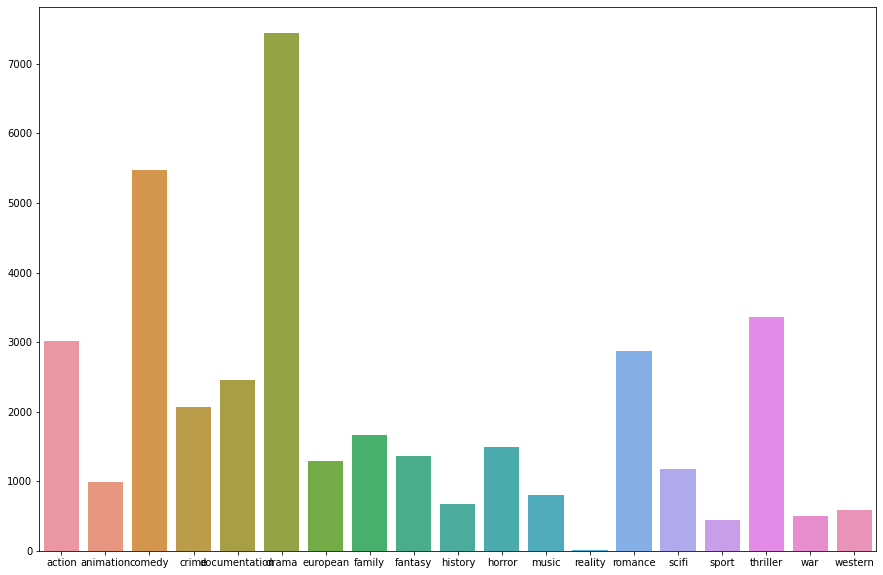

In [1048]:
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_all_dict,orient="index").T
sns.barplot(data=movie_genres)

<AxesSubplot:>

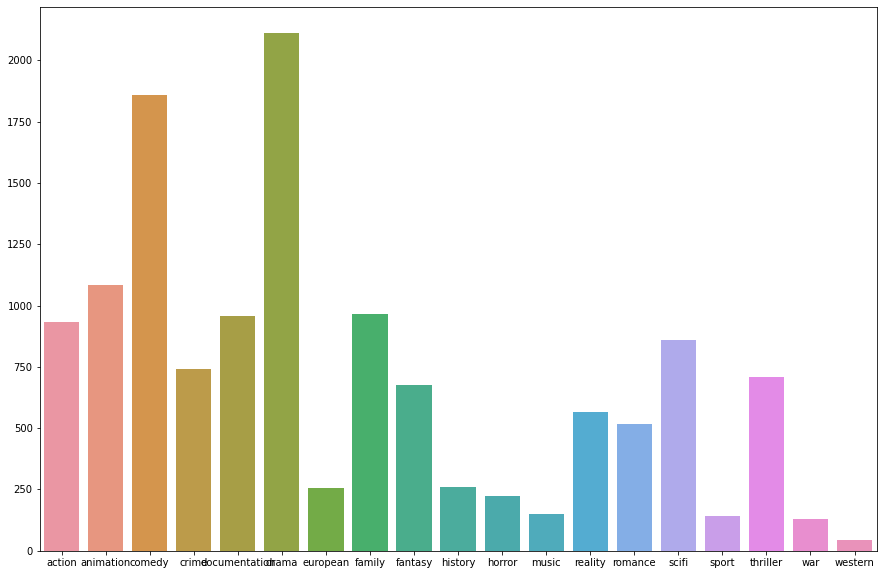

In [1049]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genres=pd.DataFrame.from_dict(genre_series_dict,orient="index").T
sns.barplot(data=show_genres)

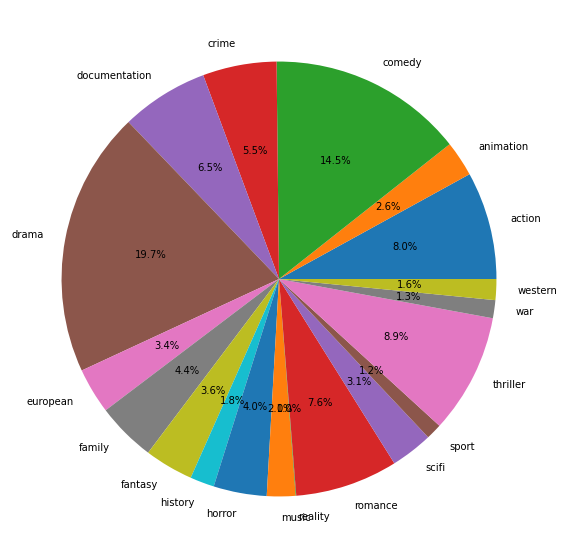

In [1050]:
# all
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_all_dict,orient="index").T

plt.pie(movie_genres.values[0],labels=movie_genres.columns,autopct="%.1f%%")
plt.show()

In [1051]:
# 장르별 ibdm score 시각화 하기 -> 평균값으로 했다 

genre_movie_idbdm={}
genre_show_idbdm={}

for i,genre in enumerate(new_genres_list):
    genre_movie_idbdm[genre] = df[df["type"]=="MOVIE"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)

    
    
for i,genre in enumerate(new_genres_list):
    genre_show_idbdm[genre] = df[df["type"]=="SHOW"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)
    



<AxesSubplot:>

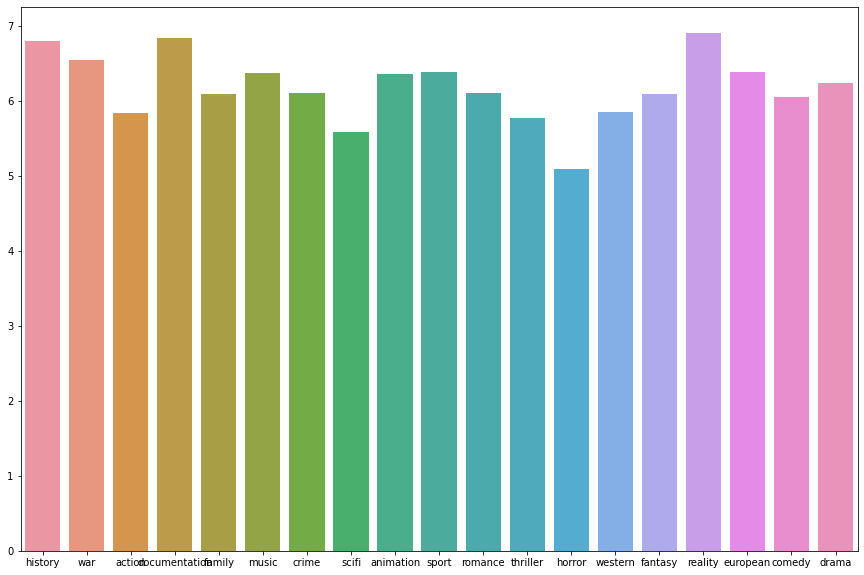

In [1052]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genr=pd.DataFrame.from_dict(genre_movie_idbdm,orient="index").T
sns.barplot(data=movie_genr)

<AxesSubplot:>

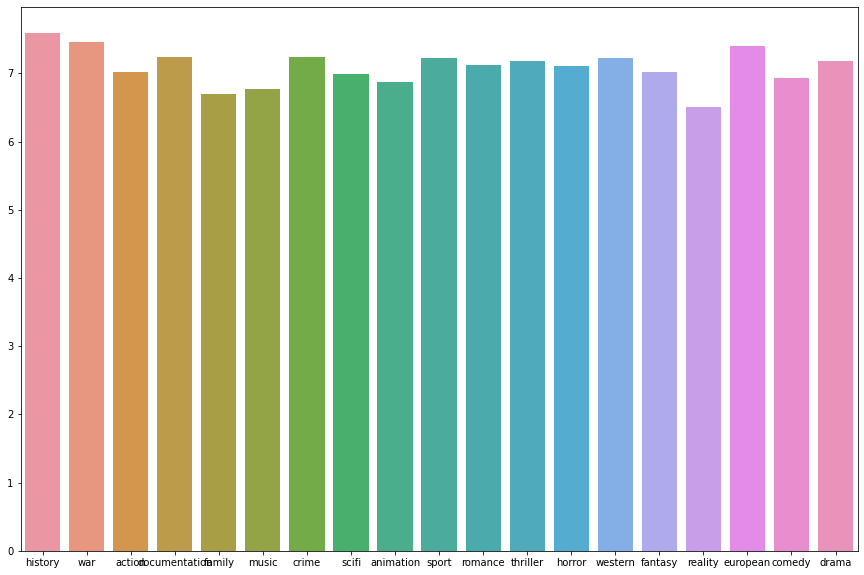

In [1053]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genr=pd.DataFrame.from_dict(genre_show_idbdm,orient="index").T
sns.barplot(data=show_genr)

In [1054]:
df['production_countries'].value_counts().index[:20]

Index(['['US']', '['IN']', '['GB']', '[]', '['JP']', '['CA']', '['FR']',
       '['KR']', '['ES']', '['AU']', '['GB', 'US']', '['CA', 'US']', '['CN']',
       '['MX']', '['DE']', '['XX']', '['IT']', '['BR']', '['US', 'GB']',
       '['US', 'CA']'],
      dtype='object')

<AxesSubplot:xlabel='production_countries', ylabel='count'>

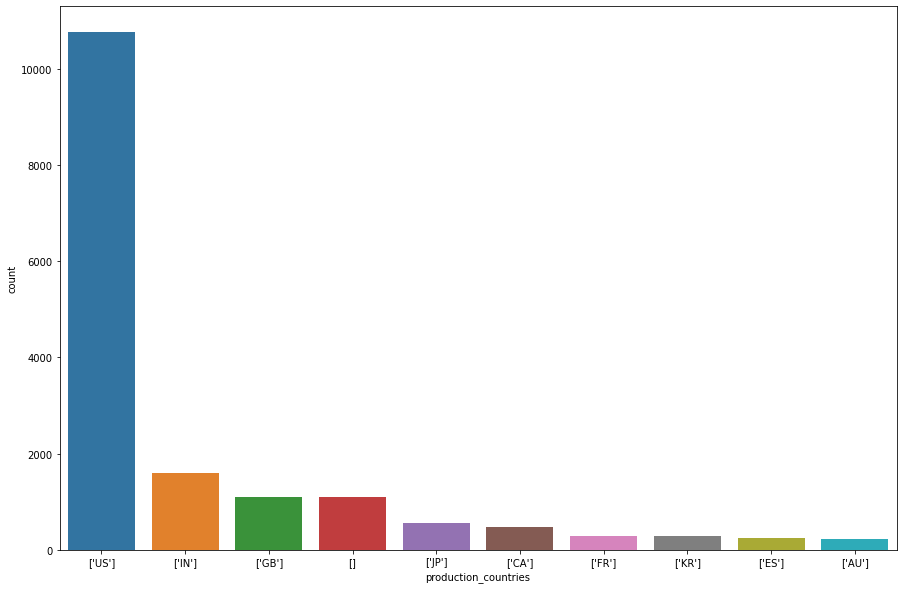

In [1055]:
# 나라별 시각화 

plt.figure(figsize=(15,10))

sns.countplot(data=df,x="production_countries",order = df['production_countries'].value_counts().index[:10]) 
# 각 독립적인 나라별로만 시각화 한것이다


In [1056]:
#플랫폼별 탑10% piechart 그리기를 위한 준비
#아마존부터

df_amazon = df[df['platform'].str.contains('AmazonPrime')]
cnt = int (df_amazon['platform'].shape[0] / 10)
df_amazon['platform'].shape[0] 

9049

In [1057]:
df_amazon_top10 = df_amazon.nlargest(cnt, 'total_pop')
df_amazon_top10.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
11239,tm375923,Turning Red,MOVIE,Thirteen-year-old Mei is experiencing the awkw...,2022,PG,100,"[fantasy, comedy, family, animation]",['US'],0.0,...,0,0,0,0,0,1,0,0,1,0
12529,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"[scifi, thriller, drama, fantasy, horror]",['US'],5.0,...,0,0,1,1,0,1,0,0,0,1
16120,tm928497,Valley of the Dead,MOVIE,They're soldiers on different sides of the war...,2022,R,101,"[comedy, horror, war, fantasy, thriller, action]",['ES'],0.0,...,0,0,1,1,0,1,0,0,1,0


In [1058]:
vals_amazon_list = df_amazon_top10['age_certification'].value_counts().values
vals_amazon_list

array([150, 144, 129, 113, 113, 100,  56,  33,  29,  24,  10,   3])

In [1059]:
idx_amazon_list = df_amazon_top10['age_certification'].value_counts().index
idx_amazon_list

Index(['R', 'PG-13', 'TV-MA', 'TV-14', 'Not Rated', 'PG', 'G', 'TV-PG',
       'TV-Y7', 'TV-G', 'TV-Y', 'NC-17'],
      dtype='object')

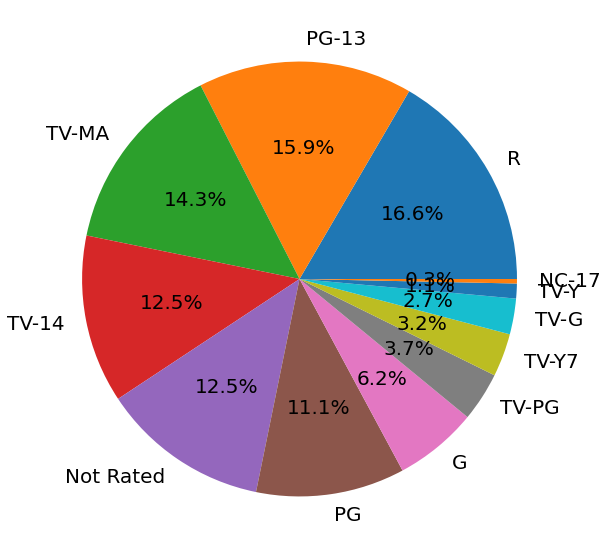

In [1060]:
#나이
plt.figure(figsize=(15,10))
plt.pie(vals_amazon_list, labels = idx_amazon_list, textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

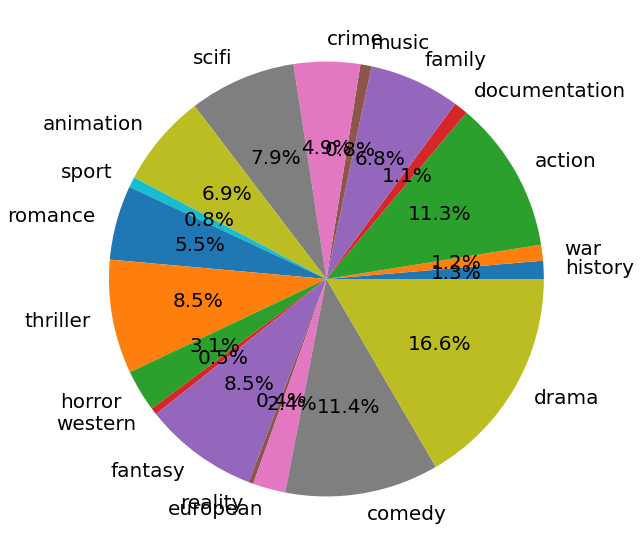

In [1061]:
#장르

genre_amazon_top10={}

for genre in new_genres_list:
    genre_amazon_top10[genre] = df_amazon_top10[genre].sum()

genre_amazon_top10
list(genre_amazon_top10.keys())
list(genre_amazon_top10.values())

plt.figure(figsize=(15,10))
plt.pie(list(genre_amazon_top10.values()), labels = list(genre_amazon_top10.keys()), textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1062]:
cntAmazon = cnt
cntAmazon

904

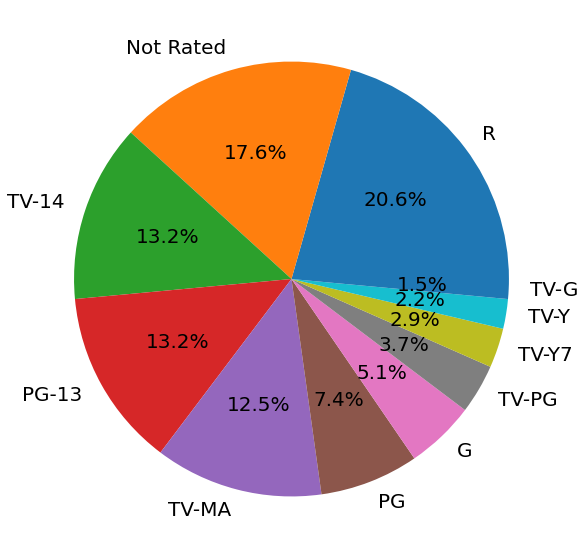

In [1063]:
df_disney = df[df['platform'].str.contains('Disney')]
cnt = int (df_disney['platform'].shape[0] / 10)

df_disney_top10 = df_disney.nlargest(cnt, 'total_pop')
df_disney_top10.head(3)

vals_disney_list = df_disney_top10['age_certification'].value_counts().values
vals_disney_list

idx_disney_list = df_disney_top10['age_certification'].value_counts().index
idx_disney_list

plt.figure(figsize=(15,10))
plt.pie(vals_disney_list, labels = idx_disney_list, textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1064]:
df_disney['platform'].shape[0] 

1363

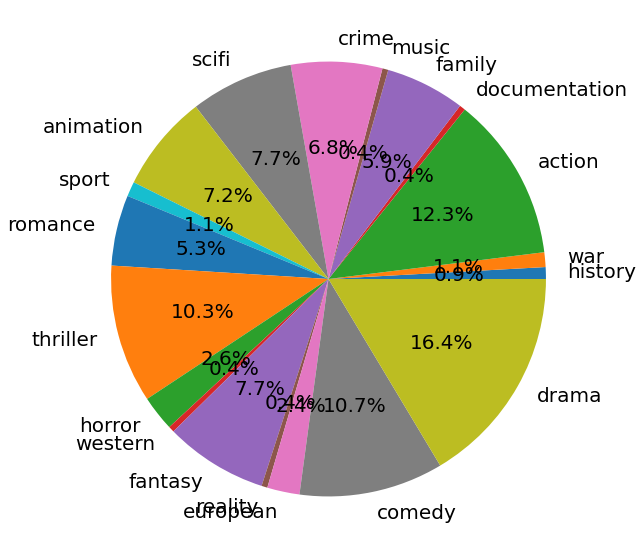

In [1065]:
genre_disney_top10={}

for genre in new_genres_list:
    genre_disney_top10[genre] = df_disney_top10[genre].sum()

genre_disney_top10
list(genre_disney_top10.keys())
list(genre_disney_top10.values())

plt.figure(figsize=(15,10))
plt.pie(list(genre_disney_top10.values()), labels = list(genre_disney_top10.keys()), textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1066]:
cntDisney = cnt
cntDisney

136

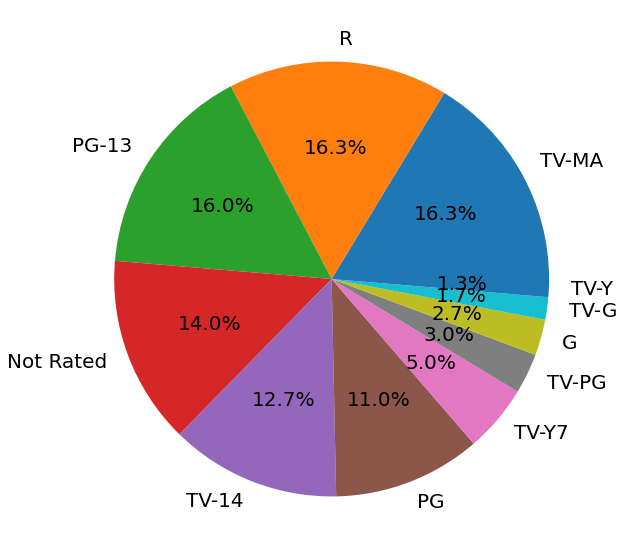

In [1067]:
df_HBO = df[df['platform'].str.contains('HBO')]
cnt = int (df_HBO['platform'].shape[0] / 10)

df_HBO_top10 = df_HBO.nlargest(cnt, 'total_pop')
df_HBO_top10.head(3)

vals_HBO_list = df_HBO_top10['age_certification'].value_counts().values
vals_HBO_list

idx_HBO_list = df_HBO_top10['age_certification'].value_counts().index
idx_HBO_list

plt.figure(figsize=(15,10))
plt.pie(vals_HBO_list, labels = idx_HBO_list, textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1068]:
df_HBO['platform'].shape[0]

3005

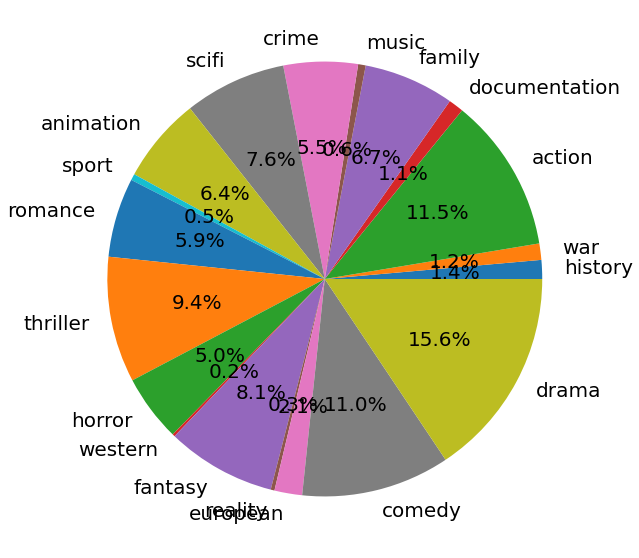

In [1069]:
genre_HBO_top10={}

for genre in new_genres_list:
    genre_HBO_top10[genre] = df_HBO_top10[genre].sum()

genre_HBO_top10
list(genre_HBO_top10.keys())
list(genre_HBO_top10.values())

plt.figure(figsize=(15,10))
plt.pie(list(genre_HBO_top10.values()), labels = list(genre_HBO_top10.keys()), textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1070]:
cntHBO = cnt
cntHBO

300

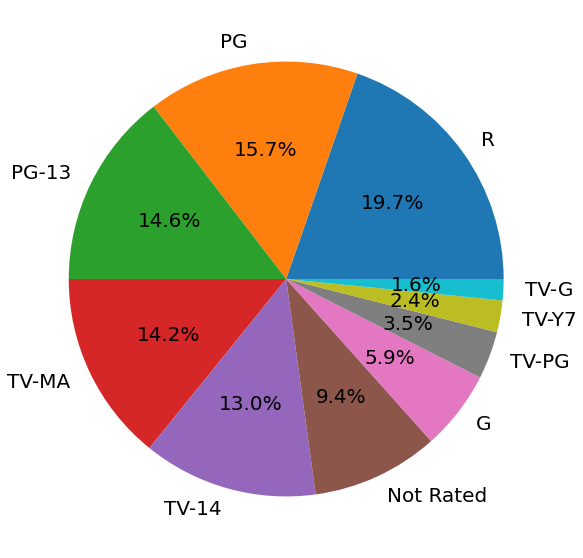

In [1071]:
df_Paramount = df[df['platform'].str.contains('Paramount')]
cnt = int (df_Paramount['platform'].shape[0] / 10)

df_Paramount_top10 = df_Paramount.nlargest(cnt, 'total_pop')
df_Paramount_top10.head(3)

vals_Paramount_list = df_Paramount_top10['age_certification'].value_counts().values
vals_Paramount_list

idx_Paramount_list = df_Paramount_top10['age_certification'].value_counts().index
idx_Paramount_list

plt.figure(figsize=(15,10))
plt.pie(vals_Paramount_list, labels = idx_Paramount_list, textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1072]:
df_Paramount['platform'].shape[0]

2545

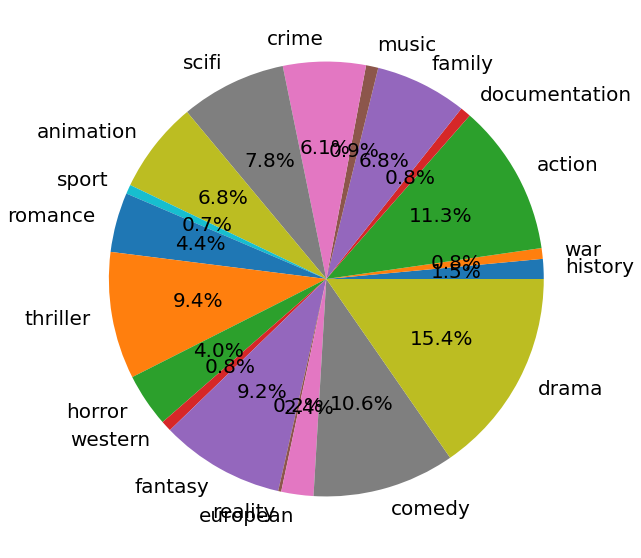

In [1073]:
genre_Paramount_top10={}

for genre in new_genres_list:
    genre_Paramount_top10[genre] = df_Paramount_top10[genre].sum()

genre_Paramount_top10
list(genre_Paramount_top10.keys())
list(genre_Paramount_top10.values())

plt.figure(figsize=(15,10))
plt.pie(list(genre_Paramount_top10.values()), labels = list(genre_Paramount_top10.keys()), textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1074]:
cntParamount = cnt
cntParamount

254

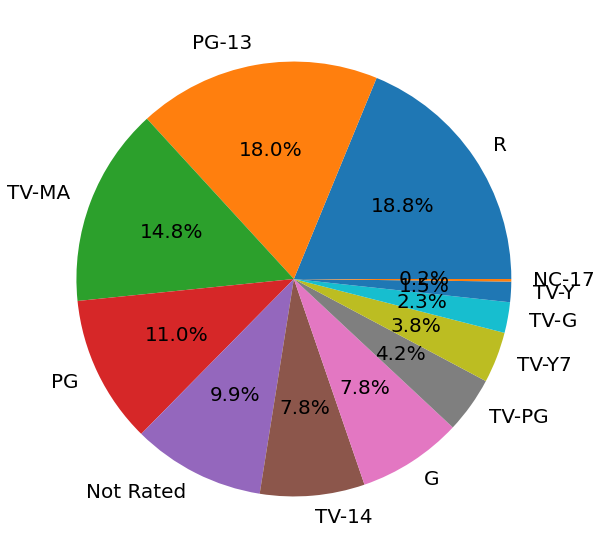

In [1075]:
df_Netflix = df[df['platform'].str.contains('Netflix')]
cnt = int (df_Netflix['platform'].shape[0] / 10)

df_Netflix_top10 = df_Netflix.nlargest(cnt, 'total_pop')
df_Netflix_top10.head(3)

vals_Netflix_list = df_Netflix_top10['age_certification'].value_counts().values
vals_Netflix_list

idx_Netflix_list = df_Netflix_top10['age_certification'].value_counts().index
idx_Netflix_list

plt.figure(figsize=(15,10))
plt.pie(vals_Netflix_list, labels = idx_Netflix_list, textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1076]:
df_Netflix['platform'].shape[0]

5271

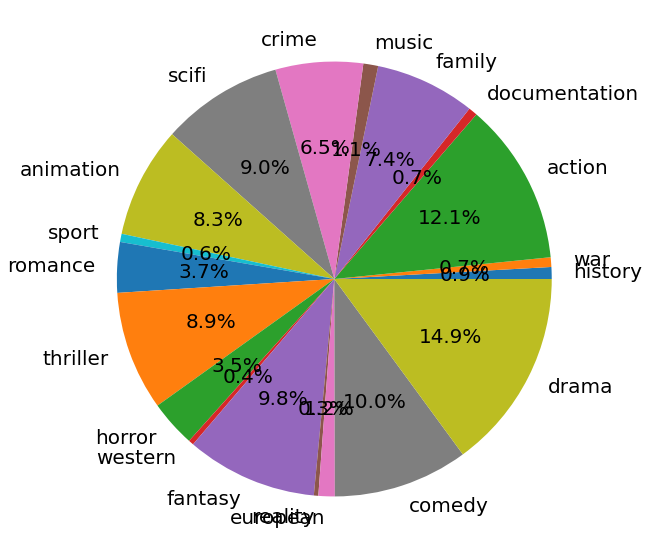

In [1077]:
genre_Netflix_top10={}

for genre in new_genres_list:
    genre_Netflix_top10[genre] = df_Netflix_top10[genre].sum()

genre_Netflix_top10
list(genre_Netflix_top10.keys())
list(genre_Netflix_top10.values())

plt.figure(figsize=(15,10))
plt.pie(list(genre_Netflix_top10.values()), labels = list(genre_Netflix_top10.keys()), textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1078]:
cntNetflix = cnt
cntNetflix

527

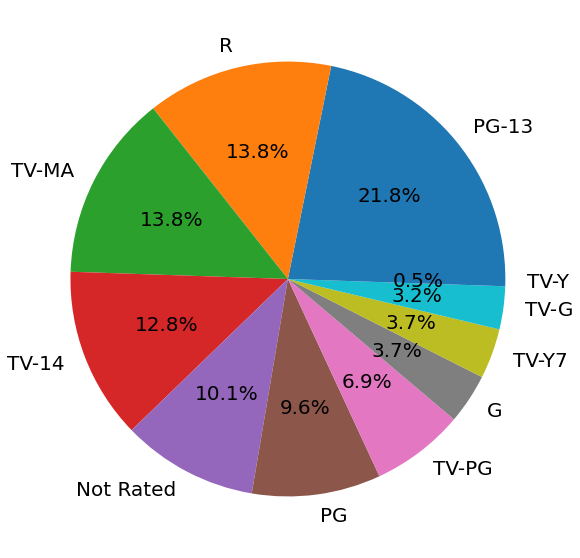

In [1079]:
df_Hulu = df[df['platform'].str.contains('Hulu')]
cnt = int (df_Hulu['platform'].shape[0] / 10)

df_Hulu_top10 = df_Hulu.nlargest(cnt, 'total_pop')
df_Hulu_top10.head(3)

vals_Hulu_list = df_Hulu_top10['age_certification'].value_counts().values
vals_Hulu_list

idx_Hulu_list = df_Hulu_top10['age_certification'].value_counts().index
idx_Hulu_list

plt.figure(figsize=(15,10))
plt.pie(vals_Hulu_list, labels = idx_Hulu_list, textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1080]:
cntHulu = cnt
cntHulu

188

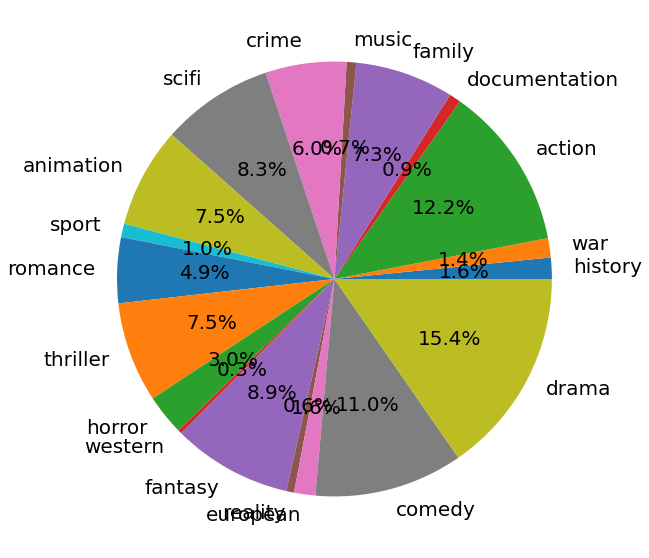

In [1081]:
genre_Hulu_top10={}

for genre in new_genres_list:
    genre_Hulu_top10[genre] = df_Hulu_top10[genre].sum()

genre_Hulu_top10
list(genre_Hulu_top10.keys())
list(genre_Hulu_top10.values())

plt.figure(figsize=(15,10))
plt.pie(list(genre_Hulu_top10.values()), labels = list(genre_Hulu_top10.keys()), textprops={'size': 20}, autopct="%.1f%%" )
plt.show()

In [1082]:
df_Hulu.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Not Rated,96,"[western, drama]",['US'],0.0,...,0,0,0,0,1,0,0,0,0,1
26,tm162994,Made for Each Other,MOVIE,A couple struggle to find happiness after a wh...,1939,Not Rated,92,"[comedy, drama, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,1,1
27,tm2721,The Thief of Bagdad,MOVIE,A recalcitrant thief vies with a duplicitous M...,1924,Not Rated,149,"[romance, family, fantasy]",['US'],0.0,...,0,1,0,0,0,1,0,0,0,0
50,tm108119,Hangmen Also Die!,MOVIE,"During the Nazi occupation of Czechoslovakia, ...",1943,Not Rated,134,"[thriller, war, drama]",['US'],0.0,...,0,0,1,0,0,0,0,0,0,1
64,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,Not Rated,79,"[thriller, crime]",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
188,tm52591,Millie,MOVIE,Millie Blake is very careful about picking her...,1931,Not Rated,85,"[drama, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,0,1
191,tm348410,Attack in the Pacific,MOVIE,Part of a a video series that documents the fi...,1944,Not Rated,52,"[war, documentation, history]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,0
221,tm109693,The Milky Way,MOVIE,"Timid milkman, Burleigh Sullivan, somehow knoc...",1936,Not Rated,89,"[comedy, family, sport, romance]",['US'],0.0,...,1,1,0,0,0,0,0,0,1,0
274,tm78294,Redhead,MOVIE,A wealthy businessman's irresponsible son and ...,1941,Not Rated,64,"[comedy, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,1,0
281,tm5402,Bill and Coo,MOVIE,The feathered residents of Chirpendale are ter...,1948,Not Rated,61,"[family, fantasy]",['US'],0.0,...,0,0,0,0,0,1,0,0,0,0


In [1083]:
df_HBO.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,sport,romance,thriller,horror,western,fantasy,reality,european,comedy,drama
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"[action, drama, war, western, comedy, european]",['US'],0.0,...,0,0,0,0,1,0,0,1,1,1
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"[drama, family, fantasy, romance, comedy]",['US'],0.0,...,0,1,0,0,0,1,0,0,1,1
18,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,Not Rated,115,"[romance, drama]",['US'],0.0,...,0,1,0,0,0,0,0,0,0,1
22,tm74259,The Pride of the Yankees,MOVIE,The story of the life and career of the baseba...,1942,Not Rated,128,"[drama, romance, sport]",['US'],0.0,...,1,1,0,0,0,0,0,0,0,1
24,tm58979,Cyrano de Bergerac,MOVIE,"France, 1640: Cyrano, the charismatic swordsma...",1950,Not Rated,112,"[drama, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,0,1
30,tm159958,Love Affair,MOVIE,French playboy Michel Marnet and American Terr...,1939,Not Rated,88,"[romance, drama, comedy]",['US'],0.0,...,0,1,0,0,0,0,0,0,1,1
34,tm159975,The Little Princess,MOVIE,The classic Shirley Temple film in which a lit...,1939,G,93,"[comedy, drama, family]",['US'],0.0,...,0,0,0,0,0,0,0,0,1,1
41,tm84154,Meet John Doe,MOVIE,"As a parting shot, fired reporter Ann Mitchell...",1941,Not Rated,122,"[romance, comedy, drama]",['US'],0.0,...,0,1,0,0,0,0,0,0,1,1
53,tm8190,The Hunchback of Notre Dame,MOVIE,"In 15th century France, a gypsy girl is framed...",1923,Not Rated,113,"[horror, drama, romance]",['US'],0.0,...,0,1,0,1,0,0,0,0,0,1
83,tm90149,Smash-Up: The Story of a Woman,MOVIE,A nightclub singer uses alcohol in excess to s...,1947,Not Rated,103,"[drama, music, romance]",['US'],0.0,...,0,1,0,0,0,0,0,0,0,1
